# Anadolu Hayat Emeklilik Datathon 2024

## Install Python Packages

In [1]:
# %pip install numpy pandas tqdm seaborn sklearn matplotlib catboost

In [2]:
import numpy as np
import pandas as pd
from tqdm import tqdm
import seaborn as sns
import warnings

# Exploratory Data Analysis

## A look at train.csv file

In [3]:
# Read train.csv file
train_df = pd.read_csv(r'/kaggle/input/anadolu-hayat-emeklilik-datathon-2024/train.csv')
train_df.head()

/tmp/ipykernel_34/951511888.py:2: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  train_df = pd.read_csv(r'/kaggle/input/anadolu-hayat-emeklilik-datathon-2024/train.csv')


,MUSTERI_ID,LABEL,FLAG,PP_CINSIYET,PP_YAS,PP_MESLEK,PP_MUSTERI_SEGMENTI,PP_UYRUK,IL,SORU_YATIRIM_KARAKTERI_CVP,...,HU11,HU12,HU13,HU14,HU15,HU16,HU17,HU18,HU19,AKTIF_ILK_POLICE_RG
0,61921038d5c39a821cfed2e5e3ad88740decd1fbd6f34b...,UA,HAZIRAN,2,505,Öğretmen,105,1,34,NaN,...,0,0,0,0,0,0,0,0,0,9
1,8cd400d3897e5ff130e8e942ee1906d17531a8253d26a4...,UA,HAZIRAN,2,889,Emekli (Sosyal Güvenlik Kurumu Bilinmiyor),102,1,20,NaN,...,0,0,0,0,0,0,0,0,0,11
2,6af95ba9ebe2362a0b31b4443fb2405b11d588780c01ad...,HU19,HAZIRAN,2,578,Muhasebe,104,1,6,Yetkin,...,0,1,0,0,0,0,0,0,0,66
3,fe33e7873368d603d2a49a982619e8d61a964d7a0ef68e...,UA,MAYIS,2,648,Diğer,106,1,34,NaN,...,0,0,0,0,0,0,0,0,0,111
4,aae8411e2c335e94922290314abe1fcc81044e8071e1c8...,UA,EYLUL,2,487,İşçi,103,1,77,NaN,...,0,0,0,0,0,0,0,0,0,90


In [4]:
# Check dtypes
print(train_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 852719 entries, 0 to 852718
Data columns (total 97 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   MUSTERI_ID                  852719 non-null  object 
 1   LABEL                       852719 non-null  object 
 2   FLAG                        852719 non-null  object 
 3   PP_CINSIYET                 852719 non-null  int64  
 4   PP_YAS                      852719 non-null  int64  
 5   PP_MESLEK                   764099 non-null  object 
 6   PP_MUSTERI_SEGMENTI         852719 non-null  int64  
 7   PP_UYRUK                    852719 non-null  int64  
 8   IL                          852719 non-null  int64  
 9   SORU_YATIRIM_KARAKTERI_CVP  132698 non-null  object 
 10  SORU_YATIRIM_KARAKTERI_RG   132698 non-null  float64
 11  SORU_MEDENI_HAL_CVP         850939 non-null  object 
 12  SORU_MEDENI_HAL_RG          850939 non-null  float64
 13  SORU_EGITIM_CV

In [5]:
# Display some statistics
train_df.describe()

,PP_CINSIYET,PP_YAS,PP_MUSTERI_SEGMENTI,PP_UYRUK,IL,SORU_YATIRIM_KARAKTERI_RG,SORU_MEDENI_HAL_RG,SORU_EGITIM_RG,SORU_GELIR_RG,SORU_COCUK_SAYISI_CVP,...,HU11,HU12,HU13,HU14,HU15,HU16,HU17,HU18,HU19,AKTIF_ILK_POLICE_RG
count,852719.000000,852719.000000,852719.000000,852719.000000,852719.000000,132698.000000,850939.000000,725624.000000,574817.000000,436159.000000,...,852719.000000,852719.000000,852719.000000,852719.000000,852719.000000,852719.000000,852719.000000,852719.000000,852719.000000,852719.000000
mean,1.494226,440.773115,104.740901,1.007269,31.022318,28.250674,87.329307,84.778107,103.253851,0.112335,...,0.002355,0.000950,0.000100,0.020374,0.000770,0.000402,0.012570,0.019923,0.006856,62.937123
std,0.499967,205.058165,1.425773,0.107100,18.434540,11.966714,69.144079,71.030740,63.343308,4.568026,...,0.053899,0.033259,0.009984,0.151613,0.027789,0.021355,0.164277,0.140382,0.100845,56.455928
min,1.000000,0.000000,101.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,316.000000,104.000000,1.000000,16.000000,20.000000,23.000000,21.000000,55.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,15.000000
50%,1.000000,470.000000,105.000000,1.000000,34.000000,29.000000,78.000000,68.000000,97.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,46.000000
75%,2.000000,585.000000,106.000000,1.000000,39.000000,38.000000,126.000000,125.000000,141.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,99.000000
max,2.000000,1474.000000,106.000000,3.000000,81.000000,50.000000,1482.000000,1482.000000,1482.000000,3000.000000,...,5.000000,5.000000,1.000000,9.000000,2.000000,3.000000,15.000000,3.000000,10.000000,239.000000


In [6]:
# Display columns
train_df.columns

Index(['MUSTERI_ID', 'LABEL', 'FLAG', 'PP_CINSIYET', 'PP_YAS', 'PP_MESLEK',
       'PP_MUSTERI_SEGMENTI', 'PP_UYRUK', 'IL', 'SORU_YATIRIM_KARAKTERI_CVP',
       'SORU_YATIRIM_KARAKTERI_RG', 'SORU_MEDENI_HAL_CVP',
       'SORU_MEDENI_HAL_RG', 'SORU_EGITIM_CVP', 'SORU_EGITIM_RG',
       'SORU_GELIR_CVP', 'SORU_GELIR_RG', 'SORU_COCUK_SAYISI_CVP',
       'SORU_COCUK_SAYISI_RG', 'BES_AYRILMA_TALEP_ADET', 'ODEMEME_TALEP_ADET',
       'HAYAT_AYRILMA_TALEP_ADET', 'BILGI_TALEP_ADET', 'VADE_TUTAR_0',
       'ODEME_TUTAR_0', 'VADE_TUTAR_1', 'ODEME_TUTAR_1', 'VADE_TUTAR_2',
       'ODEME_TUTAR_2', 'VADE_TUTAR_3', 'ODEME_TUTAR_3', 'VADE_TUTAR_4',
       'ODEME_TUTAR_4', 'VADE_TUTAR_5', 'ODEME_TUTAR_5', 'VADE_TUTAR_6',
       'ODEME_TUTAR_6', 'VADE_TUTAR_7', 'ODEME_TUTAR_7', 'VADE_TUTAR_8',
       'ODEME_TUTAR_8', 'VADE_TUTAR_9', 'ODEME_TUTAR_9', 'VADE_TUTAR_10',
       'ODEME_TUTAR_10', 'VADE_TUTAR_11', 'ODEME_TUTAR_11',
       'SON_AY_KATKI_MIKTARI', 'SON_AY_KATKI_ADET', 'SON_CEYREK_KATKI_MIKTARI'

In [7]:
# Display the number of null values in each column

from pandas import option_context
with option_context('display.max_rows', 150, 'display.max_columns', 5):
    print(train_df.isnull().sum())

MUSTERI_ID                         0
LABEL                              0
FLAG                               0
PP_CINSIYET                        0
PP_YAS                             0
PP_MESLEK                      88620
PP_MUSTERI_SEGMENTI                0
PP_UYRUK                           0
IL                                 0
SORU_YATIRIM_KARAKTERI_CVP    720021
SORU_YATIRIM_KARAKTERI_RG     720021
SORU_MEDENI_HAL_CVP             1780
SORU_MEDENI_HAL_RG              1780
SORU_EGITIM_CVP               127095
SORU_EGITIM_RG                127095
SORU_GELIR_CVP                277902
SORU_GELIR_RG                 277902
SORU_COCUK_SAYISI_CVP         416560
SORU_COCUK_SAYISI_RG          416560
BES_AYRILMA_TALEP_ADET             0
ODEMEME_TALEP_ADET                 0
HAYAT_AYRILMA_TALEP_ADET           0
BILGI_TALEP_ADET                   0
VADE_TUTAR_0                       0
ODEME_TUTAR_0                      0
VADE_TUTAR_1                       0
ODEME_TUTAR_1                      0
V

## A look at test.csv file

In [8]:
# Read test.csv file
test_df = pd.read_csv(r'/kaggle/input/anadolu-hayat-emeklilik-datathon-2024/test.csv')
test_df.head()

/tmp/ipykernel_34/1109478563.py:2: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  test_df = pd.read_csv(r'/kaggle/input/anadolu-hayat-emeklilik-datathon-2024/test.csv')


,MUSTERI_ID,FLAG,PP_CINSIYET,PP_YAS,PP_MESLEK,PP_MUSTERI_SEGMENTI,PP_UYRUK,IL,SORU_YATIRIM_KARAKTERI_CVP,SORU_YATIRIM_KARAKTERI_RG,...,HU11,HU12,HU13,HU14,HU15,HU16,HU17,HU18,HU19,AKTIF_ILK_POLICE_RG
0,15b29e51dff893ac19bcbc96c96d1cda0307b4e0edafcd...,KASIM,2,467,Öğretmen,103,1,1.0,NaN,NaN,...,0,0,0,0,0,0,0,0,0,100
1,7532c2d4751858dd8e7eb3f26c61af568fd3b2a6aa2f32...,KASIM,1,658,Öğretmen,106,1,54.0,NaN,NaN,...,0,0,0,0,0,0,0,0,0,111
2,47498c1c6161aea484b0eed7997846919ca9287684aee4...,KASIM,1,634,Serbest Meslek,106,1,48.0,NaN,NaN,...,0,0,0,0,0,0,0,0,0,127
3,48fe7f96c7e04326f1669b4ae5bdc5ae030da6b8c26498...,KASIM,2,638,NaN,106,1,67.0,NaN,NaN,...,0,0,0,0,0,0,0,0,0,178
4,26dbe514ebfdb7b664760c07f94d0bf0b297528cd5a358...,KASIM,1,80,Öğrenci,106,1,34.0,NaN,NaN,...,0,0,0,0,0,0,0,0,0,3


In [9]:
# Display some statistics
test_df.describe()

,PP_CINSIYET,PP_YAS,PP_MUSTERI_SEGMENTI,PP_UYRUK,IL,SORU_YATIRIM_KARAKTERI_RG,SORU_MEDENI_HAL_RG,SORU_EGITIM_RG,SORU_GELIR_RG,SORU_COCUK_SAYISI_CVP,...,HU11,HU12,HU13,HU14,HU15,HU16,HU17,HU18,HU19,AKTIF_ILK_POLICE_RG
count,195631.000000,195631.000000,195631.000000,195631.000000,195630.000000,27387.000000,195315.000000,168547.000000,115932.000000,82096.000000,...,195631.000000,195631.000000,195631.000000,195631.000000,195631.000000,195631.000000,195631.000000,195631.000000,195631.000000,195631.000000
mean,1.480532,414.359641,104.758975,1.008429,31.255155,29.352393,78.536943,77.063834,100.345228,0.101576,...,0.002679,0.000946,0.000123,0.029264,0.000312,0.000613,0.018954,0.019251,0.008061,51.047436
std,0.499622,211.130812,1.391952,0.119146,18.611391,14.992953,73.799698,74.950271,69.009387,0.471206,...,0.058983,0.048111,0.011075,0.180128,0.017655,0.026744,0.211992,0.137776,0.113142,56.765083
min,1.000000,1.000000,101.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,270.000000,104.000000,1.000000,16.000000,19.000000,15.000000,15.000000,44.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
50%,1.000000,442.000000,105.000000,1.000000,34.000000,33.000000,60.000000,55.000000,96.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,25.000000
75%,2.000000,566.000000,106.000000,1.000000,41.000000,42.000000,119.000000,117.000000,141.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,89.000000
max,2.000000,1204.000000,106.000000,3.000000,81.000000,52.000000,1487.000000,1487.000000,1487.000000,15.000000,...,4.000000,16.000000,1.000000,7.000000,1.000000,2.000000,20.000000,2.000000,7.000000,240.000000


In [10]:
# Display columns
test_df.columns

Index(['MUSTERI_ID', 'FLAG', 'PP_CINSIYET', 'PP_YAS', 'PP_MESLEK',
       'PP_MUSTERI_SEGMENTI', 'PP_UYRUK', 'IL', 'SORU_YATIRIM_KARAKTERI_CVP',
       'SORU_YATIRIM_KARAKTERI_RG', 'SORU_MEDENI_HAL_CVP',
       'SORU_MEDENI_HAL_RG', 'SORU_EGITIM_CVP', 'SORU_EGITIM_RG',
       'SORU_GELIR_CVP', 'SORU_GELIR_RG', 'SORU_COCUK_SAYISI_CVP',
       'SORU_COCUK_SAYISI_RG', 'BES_AYRILMA_TALEP_ADET', 'ODEMEME_TALEP_ADET',
       'HAYAT_AYRILMA_TALEP_ADET', 'BILGI_TALEP_ADET', 'VADE_TUTAR_0',
       'ODEME_TUTAR_0', 'VADE_TUTAR_1', 'ODEME_TUTAR_1', 'VADE_TUTAR_2',
       'ODEME_TUTAR_2', 'VADE_TUTAR_3', 'ODEME_TUTAR_3', 'VADE_TUTAR_4',
       'ODEME_TUTAR_4', 'VADE_TUTAR_5', 'ODEME_TUTAR_5', 'VADE_TUTAR_6',
       'ODEME_TUTAR_6', 'VADE_TUTAR_7', 'ODEME_TUTAR_7', 'VADE_TUTAR_8',
       'ODEME_TUTAR_8', 'VADE_TUTAR_9', 'ODEME_TUTAR_9', 'VADE_TUTAR_10',
       'ODEME_TUTAR_10', 'VADE_TUTAR_11', 'ODEME_TUTAR_11',
       'SON_AY_KATKI_MIKTARI', 'SON_AY_KATKI_ADET', 'SON_CEYREK_KATKI_MIKTARI',
       

## A Look at "Urun Ozellikleri.xlsx" File

In [11]:
# Read "Urun Ozellikleri.xlsx"
product_df = pd.read_excel(r'/kaggle/input/anadolu-hayat-emeklilik-datathon-2024/Urun Ozellikleri.xlsx')
product_df.head()

,Ürün,Branş,Grup/Ferdi,Kredili/Kredisiz,Taşınan Teminat,Biriktiren/ Koruma,Sigortas Süresi,Yenileme Fonksiyonu,Yaş Gereksinimi
0,BU01,Bireysel Emeklilik,Ferdi,Krediden bağımsız,NaN,Biriktiren,Uzun Süreli,NaN,NaN
1,BU02,Bireysel Emeklilik,Ferdi,Krediden bağımsız,NaN,Biriktiren,Uzun Süreli,NaN,18-25
2,BU03,Bireysel Emeklilik,Ferdi,Krediden bağımsız,NaN,Biriktiren,Uzun Süreli,NaN,NaN
3,BU04,Bireysel Emeklilik,Ferdi,Krediden bağımsız,NaN,Biriktiren,Uzun Süreli,NaN,NaN
4,BU05,Bireysel Emeklilik,Ferdi,Krediden bağımsız,NaN,Biriktiren,Uzun Süreli,NaN,NaN


## Distribution of Some Features in Train Dataframe

In [12]:
train_df['LABEL'].unique()

array(['UA', 'HU19', 'HU07', 'HU14', 'HU11', 'HU15', 'HU12', 'HU06'],
      dtype=object)

<Axes: xlabel='LABEL', ylabel='count'>

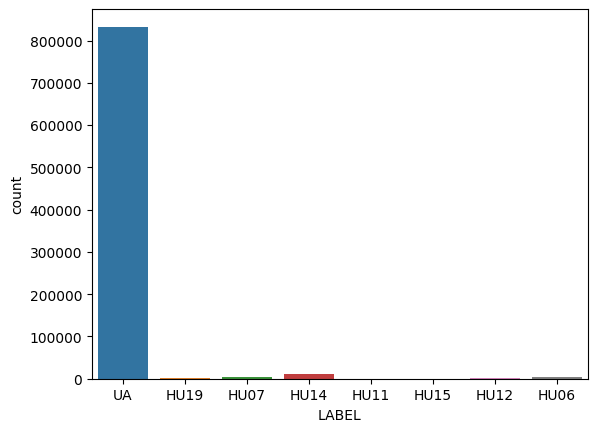

In [13]:
sns.countplot(x=train_df['LABEL'])

<Axes: xlabel='FLAG', ylabel='count'>

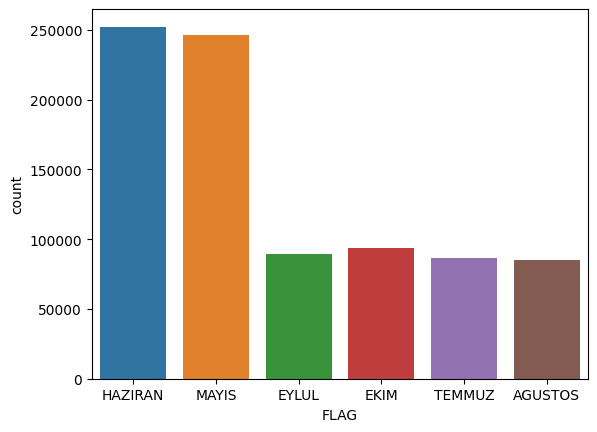

In [14]:
sns.countplot(x=train_df['FLAG'])

<Axes: xlabel='PP_CINSIYET', ylabel='count'>

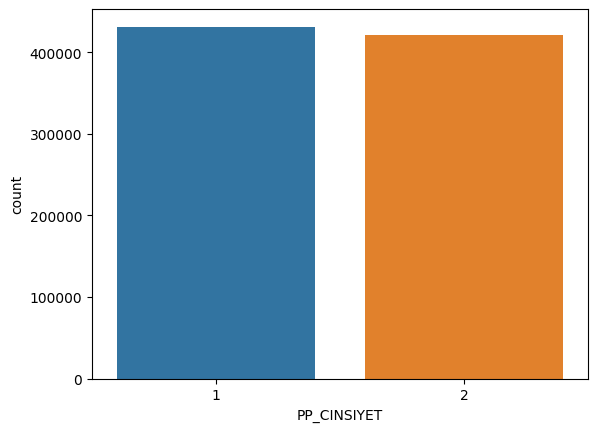

In [15]:
sns.countplot(x=train_df['PP_CINSIYET'])

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='PP_YAS', ylabel='Count'>

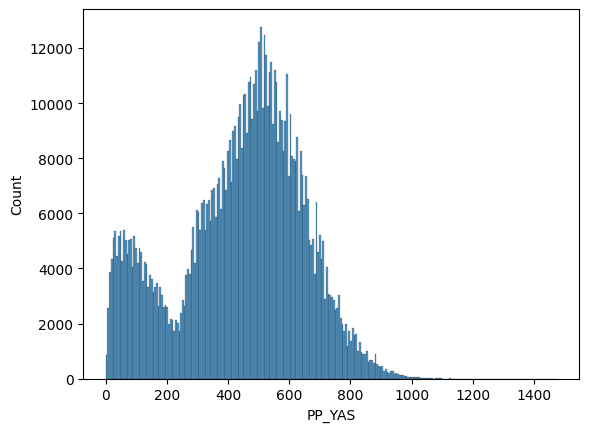

In [16]:
sns.histplot(train_df['PP_YAS'])

<Axes: xlabel='PP_YAS'>

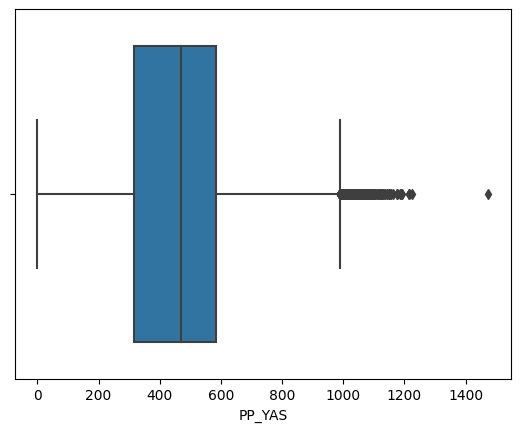

In [17]:
sns.boxplot(x=train_df['PP_YAS'])

<Axes: xlabel='PP_MUSTERI_SEGMENTI', ylabel='count'>

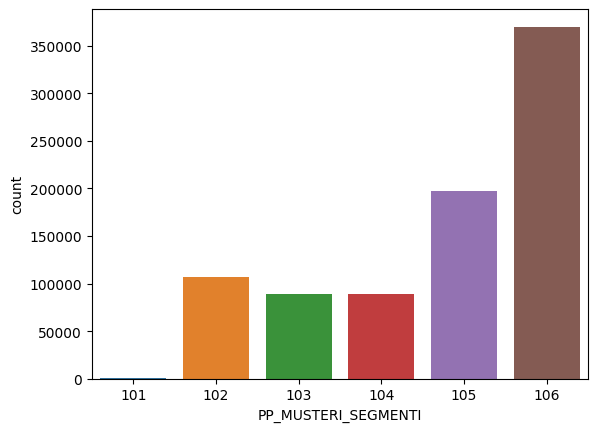

In [18]:
sns.countplot(x=train_df['PP_MUSTERI_SEGMENTI'])

<Axes: xlabel='PP_UYRUK', ylabel='count'>

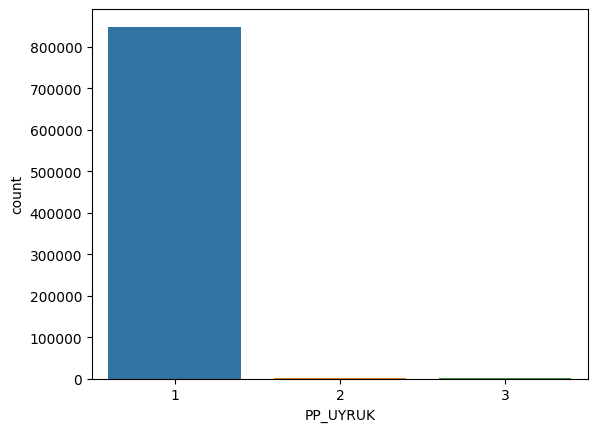

In [19]:
sns.countplot(x=train_df['PP_UYRUK'])

## Unique Values per Column 

In [20]:
categories = dict()
for column in train_df.columns:
    categories[column] = len(train_df[column].unique().tolist())

In [21]:
categories

{'MUSTERI_ID': 852719,
 'LABEL': 8,
 'FLAG': 6,
 'PP_CINSIYET': 2,
 'PP_YAS': 1123,
 'PP_MESLEK': 115,
 'PP_MUSTERI_SEGMENTI': 6,
 'PP_UYRUK': 3,
 'IL': 82,
 'SORU_YATIRIM_KARAKTERI_CVP': 6,
 'SORU_YATIRIM_KARAKTERI_RG': 52,
 'SORU_MEDENI_HAL_CVP': 8,
 'SORU_MEDENI_HAL_RG': 263,
 'SORU_EGITIM_CVP': 8,
 'SORU_EGITIM_RG': 263,
 'SORU_GELIR_CVP': 4129,
 'SORU_GELIR_RG': 263,
 'SORU_COCUK_SAYISI_CVP': 17,
 'SORU_COCUK_SAYISI_RG': 190,
 'BES_AYRILMA_TALEP_ADET': 8,
 'ODEMEME_TALEP_ADET': 5,
 'HAYAT_AYRILMA_TALEP_ADET': 6,
 'BILGI_TALEP_ADET': 13,
 'VADE_TUTAR_0': 9379,
 'ODEME_TUTAR_0': 6996,
 'VADE_TUTAR_1': 7234,
 'ODEME_TUTAR_1': 6503,
 'VADE_TUTAR_2': 7002,
 'ODEME_TUTAR_2': 6301,
 'VADE_TUTAR_3': 6915,
 'ODEME_TUTAR_3': 6221,
 'VADE_TUTAR_4': 6486,
 'ODEME_TUTAR_4': 5897,
 'VADE_TUTAR_5': 6082,
 'ODEME_TUTAR_5': 5513,
 'VADE_TUTAR_6': 6023,
 'ODEME_TUTAR_6': 5438,
 'VADE_TUTAR_7': 5539,
 'ODEME_TUTAR_7': 5094,
 'VADE_TUTAR_8': 5223,
 'ODEME_TUTAR_8': 4818,
 'VADE_TUTAR_9': 4910,
 'ODEM

# Preprocessing

## Change Index

In [22]:
train_df = train_df.set_index('MUSTERI_ID')
train_df.head()

,LABEL,FLAG,PP_CINSIYET,PP_YAS,PP_MESLEK,PP_MUSTERI_SEGMENTI,PP_UYRUK,IL,SORU_YATIRIM_KARAKTERI_CVP,SORU_YATIRIM_KARAKTERI_RG,...,HU11,HU12,HU13,HU14,HU15,HU16,HU17,HU18,HU19,AKTIF_ILK_POLICE_RG
MUSTERI_ID,,,,,,,,,,,,,,,,,,,,,
61921038d5c39a821cfed2e5e3ad88740decd1fbd6f34ba975819dd9907482e7,UA,HAZIRAN,2,505,Öğretmen,105,1,34,NaN,NaN,...,0,0,0,0,0,0,0,0,0,9
8cd400d3897e5ff130e8e942ee1906d17531a8253d26a466b2ad97023bfd5bfd,UA,HAZIRAN,2,889,Emekli (Sosyal Güvenlik Kurumu Bilinmiyor),102,1,20,NaN,NaN,...,0,0,0,0,0,0,0,0,0,11
6af95ba9ebe2362a0b31b4443fb2405b11d588780c01ad744bdb43e9419b875f,HU19,HAZIRAN,2,578,Muhasebe,104,1,6,Yetkin,26.0,...,0,1,0,0,0,0,0,0,0,66
fe33e7873368d603d2a49a982619e8d61a964d7a0ef68e4fa8e4300ed5303ef5,UA,MAYIS,2,648,Diğer,106,1,34,NaN,NaN,...,0,0,0,0,0,0,0,0,0,111
aae8411e2c335e94922290314abe1fcc81044e8071e1c85fe77c4e13b000d491,UA,EYLUL,2,487,İşçi,103,1,77,NaN,NaN,...,0,0,0,0,0,0,0,0,0,90


In [23]:
test_df = test_df.set_index('MUSTERI_ID')
test_df.head()

,FLAG,PP_CINSIYET,PP_YAS,PP_MESLEK,PP_MUSTERI_SEGMENTI,PP_UYRUK,IL,SORU_YATIRIM_KARAKTERI_CVP,SORU_YATIRIM_KARAKTERI_RG,SORU_MEDENI_HAL_CVP,...,HU11,HU12,HU13,HU14,HU15,HU16,HU17,HU18,HU19,AKTIF_ILK_POLICE_RG
MUSTERI_ID,,,,,,,,,,,,,,,,,,,,,
15b29e51dff893ac19bcbc96c96d1cda0307b4e0edafcd565cea33fe24f516a8,KASIM,2,467,Öğretmen,103,1,1.0,NaN,NaN,Married,...,0,0,0,0,0,0,0,0,0,100
7532c2d4751858dd8e7eb3f26c61af568fd3b2a6aa2f32db98d7d58442898bd0,KASIM,1,658,Öğretmen,106,1,54.0,NaN,NaN,Married,...,0,0,0,0,0,0,0,0,0,111
47498c1c6161aea484b0eed7997846919ca9287684aee4046cc2708b7985fb9e,KASIM,1,634,Serbest Meslek,106,1,48.0,NaN,NaN,Married,...,0,0,0,0,0,0,0,0,0,127
48fe7f96c7e04326f1669b4ae5bdc5ae030da6b8c264984266878976dccd6b87,KASIM,2,638,NaN,106,1,67.0,NaN,NaN,Married,...,0,0,0,0,0,0,0,0,0,178
26dbe514ebfdb7b664760c07f94d0bf0b297528cd5a35872a6756a00c6cb29a7,KASIM,1,80,Öğrenci,106,1,34.0,NaN,NaN,Single,...,0,0,0,0,0,0,0,0,0,3


## Add a LABEL Column to test_df to Work More Comfortably

In [24]:
test_df['LABEL'] = ['UA'] * len(test_df)

## New Feature Creation

### Age in Years

In [25]:
# Calculate ages of customers in years and add as a new column
def add_yas_yil_feature(df):
    df['YAS_YIL'] = (df['PP_YAS'] / 12).astype(int)

add_yas_yil_feature(train_df)
add_yas_yil_feature(test_df)
train_df.head()

,LABEL,FLAG,PP_CINSIYET,PP_YAS,PP_MESLEK,PP_MUSTERI_SEGMENTI,PP_UYRUK,IL,SORU_YATIRIM_KARAKTERI_CVP,SORU_YATIRIM_KARAKTERI_RG,...,HU12,HU13,HU14,HU15,HU16,HU17,HU18,HU19,AKTIF_ILK_POLICE_RG,YAS_YIL
MUSTERI_ID,,,,,,,,,,,,,,,,,,,,,
61921038d5c39a821cfed2e5e3ad88740decd1fbd6f34ba975819dd9907482e7,UA,HAZIRAN,2,505,Öğretmen,105,1,34,NaN,NaN,...,0,0,0,0,0,0,0,0,9,42
8cd400d3897e5ff130e8e942ee1906d17531a8253d26a466b2ad97023bfd5bfd,UA,HAZIRAN,2,889,Emekli (Sosyal Güvenlik Kurumu Bilinmiyor),102,1,20,NaN,NaN,...,0,0,0,0,0,0,0,0,11,74
6af95ba9ebe2362a0b31b4443fb2405b11d588780c01ad744bdb43e9419b875f,HU19,HAZIRAN,2,578,Muhasebe,104,1,6,Yetkin,26.0,...,1,0,0,0,0,0,0,0,66,48
fe33e7873368d603d2a49a982619e8d61a964d7a0ef68e4fa8e4300ed5303ef5,UA,MAYIS,2,648,Diğer,106,1,34,NaN,NaN,...,0,0,0,0,0,0,0,0,111,54
aae8411e2c335e94922290314abe1fcc81044e8071e1c85fe77c4e13b000d491,UA,EYLUL,2,487,İşçi,103,1,77,NaN,NaN,...,0,0,0,0,0,0,0,0,90,40


### Combine Some Categorical Features

#### Combine YAS_YIL and PP_MESLEK Columns

In [26]:
# Combine YAS_YIL and PP_MESLEK columns in a new column
def add_yas_meslek_segment_feature(df):
    df['YAS_MESLEK_SEGMENT'] = df['YAS_YIL'].astype(str) + '_' + df['PP_MESLEK'].astype(str) + '_' + df['PP_MUSTERI_SEGMENTI'].astype(str)

add_yas_meslek_segment_feature(train_df)
add_yas_meslek_segment_feature(test_df)
train_df.head()

,LABEL,FLAG,PP_CINSIYET,PP_YAS,PP_MESLEK,PP_MUSTERI_SEGMENTI,PP_UYRUK,IL,SORU_YATIRIM_KARAKTERI_CVP,SORU_YATIRIM_KARAKTERI_RG,...,HU13,HU14,HU15,HU16,HU17,HU18,HU19,AKTIF_ILK_POLICE_RG,YAS_YIL,YAS_MESLEK_SEGMENT
MUSTERI_ID,,,,,,,,,,,,,,,,,,,,,
61921038d5c39a821cfed2e5e3ad88740decd1fbd6f34ba975819dd9907482e7,UA,HAZIRAN,2,505,Öğretmen,105,1,34,NaN,NaN,...,0,0,0,0,0,0,0,9,42,42_Öğretmen_105
8cd400d3897e5ff130e8e942ee1906d17531a8253d26a466b2ad97023bfd5bfd,UA,HAZIRAN,2,889,Emekli (Sosyal Güvenlik Kurumu Bilinmiyor),102,1,20,NaN,NaN,...,0,0,0,0,0,0,0,11,74,74_Emekli (Sosyal Güvenlik Kurumu Bilinmiyor)_102
6af95ba9ebe2362a0b31b4443fb2405b11d588780c01ad744bdb43e9419b875f,HU19,HAZIRAN,2,578,Muhasebe,104,1,6,Yetkin,26.0,...,0,0,0,0,0,0,0,66,48,48_Muhasebe_104
fe33e7873368d603d2a49a982619e8d61a964d7a0ef68e4fa8e4300ed5303ef5,UA,MAYIS,2,648,Diğer,106,1,34,NaN,NaN,...,0,0,0,0,0,0,0,111,54,54_Diğer_106
aae8411e2c335e94922290314abe1fcc81044e8071e1c85fe77c4e13b000d491,UA,EYLUL,2,487,İşçi,103,1,77,NaN,NaN,...,0,0,0,0,0,0,0,90,40,40_İşçi_103


#### Combine SORU_MEDENI_HAL_CVP, PP_MESLEK and SORU_EGITIM_CVP Columns

In [27]:
# Combine SORU_MEDENI_HAL_CVP, PP_MESLEK and SORU_EGITIM_CVP columns in a new column
def add_meslek_medeni_hal(df):
    df['MESLEK_MEDENI'] = df['SORU_MEDENI_HAL_CVP'].astype(str) + '_' + df['PP_MESLEK'].astype(str) + '_' + df['SORU_EGITIM_CVP'].astype(str)

add_meslek_medeni_hal(train_df)
add_meslek_medeni_hal(test_df)
train_df.head()

,LABEL,FLAG,PP_CINSIYET,PP_YAS,PP_MESLEK,PP_MUSTERI_SEGMENTI,PP_UYRUK,IL,SORU_YATIRIM_KARAKTERI_CVP,SORU_YATIRIM_KARAKTERI_RG,...,HU14,HU15,HU16,HU17,HU18,HU19,AKTIF_ILK_POLICE_RG,YAS_YIL,YAS_MESLEK_SEGMENT,MESLEK_MEDENI
MUSTERI_ID,,,,,,,,,,,,,,,,,,,,,
61921038d5c39a821cfed2e5e3ad88740decd1fbd6f34ba975819dd9907482e7,UA,HAZIRAN,2,505,Öğretmen,105,1,34,NaN,NaN,...,0,0,0,0,0,0,9,42,42_Öğretmen_105,Single_Öğretmen_(Diğer)
8cd400d3897e5ff130e8e942ee1906d17531a8253d26a466b2ad97023bfd5bfd,UA,HAZIRAN,2,889,Emekli (Sosyal Güvenlik Kurumu Bilinmiyor),102,1,20,NaN,NaN,...,0,0,0,0,0,0,11,74,74_Emekli (Sosyal Güvenlik Kurumu Bilinmiyor)_102,Married_Emekli (Sosyal Güvenlik Kurumu Bilinmi...
6af95ba9ebe2362a0b31b4443fb2405b11d588780c01ad744bdb43e9419b875f,HU19,HAZIRAN,2,578,Muhasebe,104,1,6,Yetkin,26.0,...,0,0,0,0,0,0,66,48,48_Muhasebe_104,Single_Muhasebe_Lisans
fe33e7873368d603d2a49a982619e8d61a964d7a0ef68e4fa8e4300ed5303ef5,UA,MAYIS,2,648,Diğer,106,1,34,NaN,NaN,...,0,0,0,0,0,0,111,54,54_Diğer_106,Married_Diğer_Lise
aae8411e2c335e94922290314abe1fcc81044e8071e1c85fe77c4e13b000d491,UA,EYLUL,2,487,İşçi,103,1,77,NaN,NaN,...,0,0,0,0,0,0,90,40,40_İşçi_103,Married_İşçi_Lisans


#### Combine YAS_YIL, PP_MESLEK and SORU_MEDENI_HAL_CVP Columns

In [28]:
# Combine YAS_YIL, PP_MESLEK and SORU_MEDENI_HAL_CVP columns in a new column
def add_dogum_medeni_hal(df):
    df['DOGUM_MEDENI_MESLEK'] = df['YAS_YIL'].astype(str) + '_' + df['PP_MESLEK'].astype(str) + '_' + df['SORU_MEDENI_HAL_CVP'].astype(str)

add_dogum_medeni_hal(train_df)
add_dogum_medeni_hal(test_df)
train_df.head()

,LABEL,FLAG,PP_CINSIYET,PP_YAS,PP_MESLEK,PP_MUSTERI_SEGMENTI,PP_UYRUK,IL,SORU_YATIRIM_KARAKTERI_CVP,SORU_YATIRIM_KARAKTERI_RG,...,HU15,HU16,HU17,HU18,HU19,AKTIF_ILK_POLICE_RG,YAS_YIL,YAS_MESLEK_SEGMENT,MESLEK_MEDENI,DOGUM_MEDENI_MESLEK
MUSTERI_ID,,,,,,,,,,,,,,,,,,,,,
61921038d5c39a821cfed2e5e3ad88740decd1fbd6f34ba975819dd9907482e7,UA,HAZIRAN,2,505,Öğretmen,105,1,34,NaN,NaN,...,0,0,0,0,0,9,42,42_Öğretmen_105,Single_Öğretmen_(Diğer),42_Öğretmen_Single
8cd400d3897e5ff130e8e942ee1906d17531a8253d26a466b2ad97023bfd5bfd,UA,HAZIRAN,2,889,Emekli (Sosyal Güvenlik Kurumu Bilinmiyor),102,1,20,NaN,NaN,...,0,0,0,0,0,11,74,74_Emekli (Sosyal Güvenlik Kurumu Bilinmiyor)_102,Married_Emekli (Sosyal Güvenlik Kurumu Bilinmi...,74_Emekli (Sosyal Güvenlik Kurumu Bilinmiyor)_...
6af95ba9ebe2362a0b31b4443fb2405b11d588780c01ad744bdb43e9419b875f,HU19,HAZIRAN,2,578,Muhasebe,104,1,6,Yetkin,26.0,...,0,0,0,0,0,66,48,48_Muhasebe_104,Single_Muhasebe_Lisans,48_Muhasebe_Single
fe33e7873368d603d2a49a982619e8d61a964d7a0ef68e4fa8e4300ed5303ef5,UA,MAYIS,2,648,Diğer,106,1,34,NaN,NaN,...,0,0,0,0,0,111,54,54_Diğer_106,Married_Diğer_Lise,54_Diğer_Married
aae8411e2c335e94922290314abe1fcc81044e8071e1c85fe77c4e13b000d491,UA,EYLUL,2,487,İşçi,103,1,77,NaN,NaN,...,0,0,0,0,0,90,40,40_İşçi_103,Married_İşçi_Lisans,40_İşçi_Married


#### Combine ANAPARA and GETIRI Columns

In [29]:
# Combine ANAPARA and GETIRI columns in a new column
def add_anapara_getiri(df):
    df['ANAPARAGETIRI'] = df['ANAPARA'].astype(str) + '_' + df['GETIRI'].astype(str)

add_anapara_getiri(train_df)
add_anapara_getiri(test_df)
train_df.head()


,LABEL,FLAG,PP_CINSIYET,PP_YAS,PP_MESLEK,PP_MUSTERI_SEGMENTI,PP_UYRUK,IL,SORU_YATIRIM_KARAKTERI_CVP,SORU_YATIRIM_KARAKTERI_RG,...,HU16,HU17,HU18,HU19,AKTIF_ILK_POLICE_RG,YAS_YIL,YAS_MESLEK_SEGMENT,MESLEK_MEDENI,DOGUM_MEDENI_MESLEK,ANAPARAGETIRI
MUSTERI_ID,,,,,,,,,,,,,,,,,,,,,
61921038d5c39a821cfed2e5e3ad88740decd1fbd6f34ba975819dd9907482e7,UA,HAZIRAN,2,505,Öğretmen,105,1,34,NaN,NaN,...,0,0,0,0,9,42,42_Öğretmen_105,Single_Öğretmen_(Diğer),42_Öğretmen_Single,2654_132
8cd400d3897e5ff130e8e942ee1906d17531a8253d26a466b2ad97023bfd5bfd,UA,HAZIRAN,2,889,Emekli (Sosyal Güvenlik Kurumu Bilinmiyor),102,1,20,NaN,NaN,...,0,0,0,0,11,74,74_Emekli (Sosyal Güvenlik Kurumu Bilinmiyor)_102,Married_Emekli (Sosyal Güvenlik Kurumu Bilinmi...,74_Emekli (Sosyal Güvenlik Kurumu Bilinmiyor)_...,62945_75370
6af95ba9ebe2362a0b31b4443fb2405b11d588780c01ad744bdb43e9419b875f,HU19,HAZIRAN,2,578,Muhasebe,104,1,6,Yetkin,26.0,...,0,0,0,0,66,48,48_Muhasebe_104,Single_Muhasebe_Lisans,48_Muhasebe_Single,22929_16055
fe33e7873368d603d2a49a982619e8d61a964d7a0ef68e4fa8e4300ed5303ef5,UA,MAYIS,2,648,Diğer,106,1,34,NaN,NaN,...,0,0,0,0,111,54,54_Diğer_106,Married_Diğer_Lise,54_Diğer_Married,178_497
aae8411e2c335e94922290314abe1fcc81044e8071e1c85fe77c4e13b000d491,UA,EYLUL,2,487,İşçi,103,1,77,NaN,NaN,...,0,0,0,0,90,40,40_İşçi_103,Married_İşçi_Lisans,40_İşçi_Married,1378_1151


#### Combine AKTIF_ILK_POLICE_RG and 'SORU_COCUK_SAYISI_RG Columns

In [30]:
# Combine AKTIF_ILK_POLICE_RG and 'SORU_COCUK_SAYISI_RG columns in a new column
def add_cocuksayı_aktifpolice(df):
    df['COCUKSAYIPOLICE'] = df['AKTIF_ILK_POLICE_RG'].astype(str) + '_' + df['SORU_COCUK_SAYISI_RG'].astype(str)

add_cocuksayı_aktifpolice(train_df)
add_cocuksayı_aktifpolice(test_df)
train_df.head()

,LABEL,FLAG,PP_CINSIYET,PP_YAS,PP_MESLEK,PP_MUSTERI_SEGMENTI,PP_UYRUK,IL,SORU_YATIRIM_KARAKTERI_CVP,SORU_YATIRIM_KARAKTERI_RG,...,HU17,HU18,HU19,AKTIF_ILK_POLICE_RG,YAS_YIL,YAS_MESLEK_SEGMENT,MESLEK_MEDENI,DOGUM_MEDENI_MESLEK,ANAPARAGETIRI,COCUKSAYIPOLICE
MUSTERI_ID,,,,,,,,,,,,,,,,,,,,,
61921038d5c39a821cfed2e5e3ad88740decd1fbd6f34ba975819dd9907482e7,UA,HAZIRAN,2,505,Öğretmen,105,1,34,NaN,NaN,...,0,0,0,9,42,42_Öğretmen_105,Single_Öğretmen_(Diğer),42_Öğretmen_Single,2654_132,9_nan
8cd400d3897e5ff130e8e942ee1906d17531a8253d26a466b2ad97023bfd5bfd,UA,HAZIRAN,2,889,Emekli (Sosyal Güvenlik Kurumu Bilinmiyor),102,1,20,NaN,NaN,...,0,0,0,11,74,74_Emekli (Sosyal Güvenlik Kurumu Bilinmiyor)_102,Married_Emekli (Sosyal Güvenlik Kurumu Bilinmi...,74_Emekli (Sosyal Güvenlik Kurumu Bilinmiyor)_...,62945_75370,11_nan
6af95ba9ebe2362a0b31b4443fb2405b11d588780c01ad744bdb43e9419b875f,HU19,HAZIRAN,2,578,Muhasebe,104,1,6,Yetkin,26.0,...,0,0,0,66,48,48_Muhasebe_104,Single_Muhasebe_Lisans,48_Muhasebe_Single,22929_16055,66_235.0
fe33e7873368d603d2a49a982619e8d61a964d7a0ef68e4fa8e4300ed5303ef5,UA,MAYIS,2,648,Diğer,106,1,34,NaN,NaN,...,0,0,0,111,54,54_Diğer_106,Married_Diğer_Lise,54_Diğer_Married,178_497,111_111.0
aae8411e2c335e94922290314abe1fcc81044e8071e1c85fe77c4e13b000d491,UA,EYLUL,2,487,İşçi,103,1,77,NaN,NaN,...,0,0,0,90,40,40_İşçi_103,Married_İşçi_Lisans,40_İşçi_Married,1378_1151,90_91.0


### Adding New Numerical Features

#### Sum Values of "VADE_TUTAR" Columns of Last 3 Months

In [31]:
# Sum values of "VADE_TUTAR" columns of last 3 months
def add_son3ay_vade(df):
    df['vade_tutar_3_ay' ]=df['VADE_TUTAR_9'] + df['VADE_TUTAR_10'] + df['VADE_TUTAR_11']

add_son3ay_vade(train_df)
add_son3ay_vade(test_df)
train_df.head()

,LABEL,FLAG,PP_CINSIYET,PP_YAS,PP_MESLEK,PP_MUSTERI_SEGMENTI,PP_UYRUK,IL,SORU_YATIRIM_KARAKTERI_CVP,SORU_YATIRIM_KARAKTERI_RG,...,HU18,HU19,AKTIF_ILK_POLICE_RG,YAS_YIL,YAS_MESLEK_SEGMENT,MESLEK_MEDENI,DOGUM_MEDENI_MESLEK,ANAPARAGETIRI,COCUKSAYIPOLICE,vade_tutar_3_ay
MUSTERI_ID,,,,,,,,,,,,,,,,,,,,,
61921038d5c39a821cfed2e5e3ad88740decd1fbd6f34ba975819dd9907482e7,UA,HAZIRAN,2,505,Öğretmen,105,1,34,NaN,NaN,...,0,0,9,42,42_Öğretmen_105,Single_Öğretmen_(Diğer),42_Öğretmen_Single,2654_132,9_nan,220
8cd400d3897e5ff130e8e942ee1906d17531a8253d26a466b2ad97023bfd5bfd,UA,HAZIRAN,2,889,Emekli (Sosyal Güvenlik Kurumu Bilinmiyor),102,1,20,NaN,NaN,...,0,0,11,74,74_Emekli (Sosyal Güvenlik Kurumu Bilinmiyor)_102,Married_Emekli (Sosyal Güvenlik Kurumu Bilinmi...,74_Emekli (Sosyal Güvenlik Kurumu Bilinmiyor)_...,62945_75370,11_nan,2871
6af95ba9ebe2362a0b31b4443fb2405b11d588780c01ad744bdb43e9419b875f,HU19,HAZIRAN,2,578,Muhasebe,104,1,6,Yetkin,26.0,...,0,0,66,48,48_Muhasebe_104,Single_Muhasebe_Lisans,48_Muhasebe_Single,22929_16055,66_235.0,1893
fe33e7873368d603d2a49a982619e8d61a964d7a0ef68e4fa8e4300ed5303ef5,UA,MAYIS,2,648,Diğer,106,1,34,NaN,NaN,...,0,0,111,54,54_Diğer_106,Married_Diğer_Lise,54_Diğer_Married,178_497,111_111.0,918
aae8411e2c335e94922290314abe1fcc81044e8071e1c85fe77c4e13b000d491,UA,EYLUL,2,487,İşçi,103,1,77,NaN,NaN,...,0,0,90,40,40_İşçi_103,Married_İşçi_Lisans,40_İşçi_Married,1378_1151,90_91.0,744


#### Sum Values of "ODEME_TUTAR" Columns of Last 3 Months

In [32]:
# Sum values of "ODEME_TUTAR" columns of last 3 months
def add_son3ay_ödeme(df):
    df['ödeme_tutar_3_ay' ]=df['ODEME_TUTAR_9'] + df['ODEME_TUTAR_10'] + df['ODEME_TUTAR_11']

add_son3ay_ödeme(train_df)
add_son3ay_ödeme(test_df)
train_df.head()

,LABEL,FLAG,PP_CINSIYET,PP_YAS,PP_MESLEK,PP_MUSTERI_SEGMENTI,PP_UYRUK,IL,SORU_YATIRIM_KARAKTERI_CVP,SORU_YATIRIM_KARAKTERI_RG,...,HU19,AKTIF_ILK_POLICE_RG,YAS_YIL,YAS_MESLEK_SEGMENT,MESLEK_MEDENI,DOGUM_MEDENI_MESLEK,ANAPARAGETIRI,COCUKSAYIPOLICE,vade_tutar_3_ay,ödeme_tutar_3_ay
MUSTERI_ID,,,,,,,,,,,,,,,,,,,,,
61921038d5c39a821cfed2e5e3ad88740decd1fbd6f34ba975819dd9907482e7,UA,HAZIRAN,2,505,Öğretmen,105,1,34,NaN,NaN,...,0,9,42,42_Öğretmen_105,Single_Öğretmen_(Diğer),42_Öğretmen_Single,2654_132,9_nan,220,220
8cd400d3897e5ff130e8e942ee1906d17531a8253d26a466b2ad97023bfd5bfd,UA,HAZIRAN,2,889,Emekli (Sosyal Güvenlik Kurumu Bilinmiyor),102,1,20,NaN,NaN,...,0,11,74,74_Emekli (Sosyal Güvenlik Kurumu Bilinmiyor)_102,Married_Emekli (Sosyal Güvenlik Kurumu Bilinmi...,74_Emekli (Sosyal Güvenlik Kurumu Bilinmiyor)_...,62945_75370,11_nan,2871,4785
6af95ba9ebe2362a0b31b4443fb2405b11d588780c01ad744bdb43e9419b875f,HU19,HAZIRAN,2,578,Muhasebe,104,1,6,Yetkin,26.0,...,0,66,48,48_Muhasebe_104,Single_Muhasebe_Lisans,48_Muhasebe_Single,22929_16055,66_235.0,1893,1893
fe33e7873368d603d2a49a982619e8d61a964d7a0ef68e4fa8e4300ed5303ef5,UA,MAYIS,2,648,Diğer,106,1,34,NaN,NaN,...,0,111,54,54_Diğer_106,Married_Diğer_Lise,54_Diğer_Married,178_497,111_111.0,918,0
aae8411e2c335e94922290314abe1fcc81044e8071e1c85fe77c4e13b000d491,UA,EYLUL,2,487,İşçi,103,1,77,NaN,NaN,...,0,90,40,40_İşçi_103,Married_İşçi_Lisans,40_İşçi_Married,1378_1151,90_91.0,744,0


#### Define Categorical Features for Encoding

In [33]:
categorical_features = ['LABEL', 'FLAG', 'PP_UYRUK', 'IL', 'SORU_YATIRIM_KARAKTERI_CVP','PP_YAS', 'PP_MESLEK', 'PP_MUSTERI_SEGMENTI', 'SORU_MEDENI_HAL_CVP', 'SORU_EGITIM_CVP', 'PP_CINSIYET']

### Rare Encoding

In [34]:
# Encoding rare values for reducing excessive diversity to reduce overfitting
def encode_rares(df):
    def encode_rares_in_column(df, column):
        df[categorical_features] = df[categorical_features].astype(str)
        
        label_count = df[column].value_counts().to_frame()
        total_count = label_count['count'].sum()
        label_count['percentage'] = label_count['count'] / total_count
        rares = label_count[label_count['percentage'] < 0.001].index
        if column == 'LABEL' or len(rares) < 2:
            return
        df[column] = df[column].replace(to_replace=rares, value='rare')

    for column in categorical_features:
        encode_rares_in_column(df, column)

encode_rares(train_df)
encode_rares(test_df)

train_df.head()

,LABEL,FLAG,PP_CINSIYET,PP_YAS,PP_MESLEK,PP_MUSTERI_SEGMENTI,PP_UYRUK,IL,SORU_YATIRIM_KARAKTERI_CVP,SORU_YATIRIM_KARAKTERI_RG,...,HU19,AKTIF_ILK_POLICE_RG,YAS_YIL,YAS_MESLEK_SEGMENT,MESLEK_MEDENI,DOGUM_MEDENI_MESLEK,ANAPARAGETIRI,COCUKSAYIPOLICE,vade_tutar_3_ay,ödeme_tutar_3_ay
MUSTERI_ID,,,,,,,,,,,,,,,,,,,,,
61921038d5c39a821cfed2e5e3ad88740decd1fbd6f34ba975819dd9907482e7,UA,HAZIRAN,2,505,Öğretmen,105,1,34,nan,NaN,...,0,9,42,42_Öğretmen_105,Single_Öğretmen_(Diğer),42_Öğretmen_Single,2654_132,9_nan,220,220
8cd400d3897e5ff130e8e942ee1906d17531a8253d26a466b2ad97023bfd5bfd,UA,HAZIRAN,2,rare,Emekli (Sosyal Güvenlik Kurumu Bilinmiyor),102,1,20,nan,NaN,...,0,11,74,74_Emekli (Sosyal Güvenlik Kurumu Bilinmiyor)_102,Married_Emekli (Sosyal Güvenlik Kurumu Bilinmi...,74_Emekli (Sosyal Güvenlik Kurumu Bilinmiyor)_...,62945_75370,11_nan,2871,4785
6af95ba9ebe2362a0b31b4443fb2405b11d588780c01ad744bdb43e9419b875f,HU19,HAZIRAN,2,578,Muhasebe,104,1,6,Yetkin,26.0,...,0,66,48,48_Muhasebe_104,Single_Muhasebe_Lisans,48_Muhasebe_Single,22929_16055,66_235.0,1893,1893
fe33e7873368d603d2a49a982619e8d61a964d7a0ef68e4fa8e4300ed5303ef5,UA,MAYIS,2,648,Diğer,106,1,34,nan,NaN,...,0,111,54,54_Diğer_106,Married_Diğer_Lise,54_Diğer_Married,178_497,111_111.0,918,0
aae8411e2c335e94922290314abe1fcc81044e8071e1c85fe77c4e13b000d491,UA,EYLUL,2,487,İşçi,103,1,77,nan,NaN,...,0,90,40,40_İşçi_103,Married_İşçi_Lisans,40_İşçi_Married,1378_1151,90_91.0,744,0


#### Add Remaining categorical_features that are Excluded from Rare Encoding (since rare encoding takes too long to encode them)

In [35]:
categorical_features += ['YAS_YIL', 'YAS_MESLEK_SEGMENT', 'DOGUM_MEDENI_MESLEK', 'MESLEK_MEDENI','vade_tutar_3_ay', 'ödeme_tutar_3_ay', 'COCUKSAYIPOLICE','ANAPARAGETIRI']

#### Fill Null Values in Column "SORU_GELIR_CVP" with Average Values of the Professions of Customers

In [36]:
# Fill null values in column "SORU_GELIR_CVP" with average values of the jobs of customers
def impute_soru_gelir_cvp(df):
    df['SORU_GELIR_CVP'] = df['SORU_GELIR_CVP'].fillna('-1.0')
    df['SORU_GELIR_CVP'] = df['SORU_GELIR_CVP'].str.replace(",", ".").astype(float)
    df[['SORU_GELIR_CVP']].head()

    average_salaries = df.groupby('PP_MESLEK')['SORU_GELIR_CVP'].mean()

    df['SORU_GELIR_CVP'] = df.apply(lambda row: average_salaries[row['PP_MESLEK']] if row['SORU_GELIR_CVP'] == -1.0 else row['SORU_GELIR_CVP'], axis=1)

impute_soru_gelir_cvp(train_df)
impute_soru_gelir_cvp(test_df)

train_df.head()

,LABEL,FLAG,PP_CINSIYET,PP_YAS,PP_MESLEK,PP_MUSTERI_SEGMENTI,PP_UYRUK,IL,SORU_YATIRIM_KARAKTERI_CVP,SORU_YATIRIM_KARAKTERI_RG,...,HU19,AKTIF_ILK_POLICE_RG,YAS_YIL,YAS_MESLEK_SEGMENT,MESLEK_MEDENI,DOGUM_MEDENI_MESLEK,ANAPARAGETIRI,COCUKSAYIPOLICE,vade_tutar_3_ay,ödeme_tutar_3_ay
MUSTERI_ID,,,,,,,,,,,,,,,,,,,,,
61921038d5c39a821cfed2e5e3ad88740decd1fbd6f34ba975819dd9907482e7,UA,HAZIRAN,2,505,Öğretmen,105,1,34,nan,NaN,...,0,9,42,42_Öğretmen_105,Single_Öğretmen_(Diğer),42_Öğretmen_Single,2654_132,9_nan,220,220
8cd400d3897e5ff130e8e942ee1906d17531a8253d26a466b2ad97023bfd5bfd,UA,HAZIRAN,2,rare,Emekli (Sosyal Güvenlik Kurumu Bilinmiyor),102,1,20,nan,NaN,...,0,11,74,74_Emekli (Sosyal Güvenlik Kurumu Bilinmiyor)_102,Married_Emekli (Sosyal Güvenlik Kurumu Bilinmi...,74_Emekli (Sosyal Güvenlik Kurumu Bilinmiyor)_...,62945_75370,11_nan,2871,4785
6af95ba9ebe2362a0b31b4443fb2405b11d588780c01ad744bdb43e9419b875f,HU19,HAZIRAN,2,578,Muhasebe,104,1,6,Yetkin,26.0,...,0,66,48,48_Muhasebe_104,Single_Muhasebe_Lisans,48_Muhasebe_Single,22929_16055,66_235.0,1893,1893
fe33e7873368d603d2a49a982619e8d61a964d7a0ef68e4fa8e4300ed5303ef5,UA,MAYIS,2,648,Diğer,106,1,34,nan,NaN,...,0,111,54,54_Diğer_106,Married_Diğer_Lise,54_Diğer_Married,178_497,111_111.0,918,0
aae8411e2c335e94922290314abe1fcc81044e8071e1c85fe77c4e13b000d491,UA,EYLUL,2,487,İşçi,103,1,77,nan,NaN,...,0,90,40,40_İşçi_103,Married_İşçi_Lisans,40_İşçi_Married,1378_1151,90_91.0,744,0


#### Compute Some Statistics Regarding "VADE_TUTAR" and "ODEME_TUTAR" Columns

In [37]:
# Compute Some Statistics Regarding "VADE_TUTAR" and "ODEME_TUTAR" columns and add as new columns
def tutar_features(df):
    vade_tutar_columns = ['VADE_TUTAR_0', 'VADE_TUTAR_1', 'VADE_TUTAR_2', 'VADE_TUTAR_3', 'VADE_TUTAR_4', 'VADE_TUTAR_5', 'VADE_TUTAR_6', 'VADE_TUTAR_7', 'VADE_TUTAR_8', 'VADE_TUTAR_9', 'VADE_TUTAR_10', 'VADE_TUTAR_11']
    odeme_tutar_columns = ['ODEME_TUTAR_0' , 'ODEME_TUTAR_1' , 'ODEME_TUTAR_2' , 'ODEME_TUTAR_3' , 'ODEME_TUTAR_4' , 'ODEME_TUTAR_5' , 'ODEME_TUTAR_6' , 'ODEME_TUTAR_7' , 'ODEME_TUTAR_8' , 'ODEME_TUTAR_9' , 'ODEME_TUTAR_10' , 'ODEME_TUTAR_11']

    df['VADE_TUTAR_MEAN'] = df[vade_tutar_columns].mean(axis=1)
    df['VADE_TUTAR_STD'] = df[vade_tutar_columns].std(axis=1)

    df['ODEME_TUTAR_MEAN'] = df[odeme_tutar_columns].mean(axis=1)
    df['ODEME_TUTAR_STD'] = df[odeme_tutar_columns].std(axis=1)

    df['VADE_ODEME_FARK'] = df['VADE_TUTAR_MEAN'] - df['ODEME_TUTAR_MEAN']

    cols = vade_tutar_columns + odeme_tutar_columns
    df = df.drop(cols, axis=1)

tutar_features(train_df)
tutar_features(test_df)

train_df.head()


,LABEL,FLAG,PP_CINSIYET,PP_YAS,PP_MESLEK,PP_MUSTERI_SEGMENTI,PP_UYRUK,IL,SORU_YATIRIM_KARAKTERI_CVP,SORU_YATIRIM_KARAKTERI_RG,...,DOGUM_MEDENI_MESLEK,ANAPARAGETIRI,COCUKSAYIPOLICE,vade_tutar_3_ay,ödeme_tutar_3_ay,VADE_TUTAR_MEAN,VADE_TUTAR_STD,ODEME_TUTAR_MEAN,ODEME_TUTAR_STD,VADE_ODEME_FARK
MUSTERI_ID,,,,,,,,,,,,,,,,,,,,,
61921038d5c39a821cfed2e5e3ad88740decd1fbd6f34ba975819dd9907482e7,UA,HAZIRAN,2,505,Öğretmen,105,1,34,nan,NaN,...,42_Öğretmen_Single,2654_132,9_nan,220,220,260.416667,150.249162,260.416667,150.249162,0.000000
8cd400d3897e5ff130e8e942ee1906d17531a8253d26a466b2ad97023bfd5bfd,UA,HAZIRAN,2,rare,Emekli (Sosyal Güvenlik Kurumu Bilinmiyor),102,1,20,nan,NaN,...,74_Emekli (Sosyal Güvenlik Kurumu Bilinmiyor)_...,62945_75370,11_nan,2871,4785,3340.333333,1837.765310,3499.833333,1785.021102,-159.500000
6af95ba9ebe2362a0b31b4443fb2405b11d588780c01ad744bdb43e9419b875f,HU19,HAZIRAN,2,578,Muhasebe,104,1,6,Yetkin,26.0,...,48_Muhasebe_Single,22929_16055,66_235.0,1893,1893,856.416667,278.576400,856.416667,278.576400,0.000000
fe33e7873368d603d2a49a982619e8d61a964d7a0ef68e4fa8e4300ed5303ef5,UA,MAYIS,2,648,Diğer,106,1,34,nan,NaN,...,54_Diğer_Married,178_497,111_111.0,918,0,395.333333,131.954078,0.000000,0.000000,395.333333
aae8411e2c335e94922290314abe1fcc81044e8071e1c85fe77c4e13b000d491,UA,EYLUL,2,487,İşçi,103,1,77,nan,NaN,...,40_İşçi_Married,1378_1151,90_91.0,744,0,388.666667,103.889218,114.750000,207.590561,273.916667


## Ordinal Encoding

In [38]:
# Convert each categorical column into string
for column in categorical_features:
    train_df[column] = train_df[column].astype(str)
    test_df[column] = test_df[column].astype(str)

# Ordinal Encoder
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()

# Fit using concatenation of train and test dataframes to identify all classes
ordinal_encoder.fit(pd.concat([train_df, test_df])[categorical_features])

# Apply Encoding
train_df[categorical_features] = ordinal_encoder.transform(train_df[categorical_features])
test_df[categorical_features] = ordinal_encoder.transform(test_df[categorical_features])

train_df.head()

,LABEL,FLAG,PP_CINSIYET,PP_YAS,PP_MESLEK,PP_MUSTERI_SEGMENTI,PP_UYRUK,IL,SORU_YATIRIM_KARAKTERI_CVP,SORU_YATIRIM_KARAKTERI_RG,...,DOGUM_MEDENI_MESLEK,ANAPARAGETIRI,COCUKSAYIPOLICE,vade_tutar_3_ay,ödeme_tutar_3_ay,VADE_TUTAR_MEAN,VADE_TUTAR_STD,ODEME_TUTAR_MEAN,ODEME_TUTAR_STD,VADE_ODEME_FARK
MUSTERI_ID,,,,,,,,,,,,,,,,,,,,,
61921038d5c39a821cfed2e5e3ad88740decd1fbd6f34ba975819dd9907482e7,7.0,4.0,1.0,294.0,55.0,4.0,0.0,53.0,5.0,NaN,...,6682.0,371853.0,23748.0,4231.0,3862.0,260.416667,150.249162,260.416667,150.249162,0.000000
8cd400d3897e5ff130e8e942ee1906d17531a8253d26a466b2ad97023bfd5bfd,7.0,4.0,1.0,536.0,13.0,1.0,0.0,25.0,5.0,NaN,...,13846.0,731509.0,2983.0,5428.0,6915.0,3340.333333,1837.765310,3499.833333,1785.021102,-159.500000
6af95ba9ebe2362a0b31b4443fb2405b11d588780c01ad744bdb43e9419b875f,6.0,4.0,1.0,374.0,30.0,3.0,0.0,108.0,4.0,26.0,...,8420.0,313511.0,18109.0,3482.0,3191.0,856.416667,278.576400,856.416667,278.576400,0.000000
fe33e7873368d603d2a49a982619e8d61a964d7a0ef68e4fa8e4300ed5303ef5,7.0,6.0,1.0,451.0,9.0,5.0,0.0,53.0,5.0,NaN,...,10101.0,213991.0,1814.0,10742.0,0.0,395.333333,131.954078,0.000000,0.000000,395.333333
aae8411e2c335e94922290314abe1fcc81044e8071e1c85fe77c4e13b000d491,7.0,3.0,1.0,274.0,59.0,2.0,0.0,141.0,5.0,NaN,...,6076.0,112826.0,22300.0,9669.0,0.0,388.666667,103.889218,114.750000,207.590561,273.916667


## Handling Missing Values

In [39]:
# Check null values
from pandas import option_context
with option_context('display.max_rows', 150, 'display.max_columns', 5):
    print(test_df.isnull().sum())

FLAG                               0
PP_CINSIYET                        0
PP_YAS                             0
PP_MESLEK                          0
PP_MUSTERI_SEGMENTI                0
PP_UYRUK                           0
IL                                 0
SORU_YATIRIM_KARAKTERI_CVP         0
SORU_YATIRIM_KARAKTERI_RG     168244
SORU_MEDENI_HAL_CVP                0
SORU_MEDENI_HAL_RG               316
SORU_EGITIM_CVP                    0
SORU_EGITIM_RG                 27084
SORU_GELIR_CVP                 34000
SORU_GELIR_RG                  79699
SORU_COCUK_SAYISI_CVP         113535
SORU_COCUK_SAYISI_RG          113535
BES_AYRILMA_TALEP_ADET             0
ODEMEME_TALEP_ADET                 0
HAYAT_AYRILMA_TALEP_ADET           0
BILGI_TALEP_ADET                   0
VADE_TUTAR_0                       0
ODEME_TUTAR_0                      0
VADE_TUTAR_1                       0
ODEME_TUTAR_1                      0
VADE_TUTAR_2                       0
ODEME_TUTAR_2                      0
V

In [40]:
# Fill null values with -1
train_df = train_df.fillna(-1)
test_df = test_df.fillna(-1)

## Preprocessing Product Features

### Convert Existing Columns into More Structured Ones

In [41]:
# Convert Existing Columns into More Structured Ones
product_df = product_df.drop('Yenileme Fonksiyonu ', axis=1)

# Encode 'TEMINAT' features in a way similar to one-hot encoding
def add_teminat_features(df):
    df['Taşınan Teminat'] = df['Taşınan Teminat'].fillna('none')

    df['TEMINAT_VEFAT'] = df['Taşınan Teminat'].str.contains('Vefat')#.astype(int)
    df['TEMINAT_MALULIYET'] = df['Taşınan Teminat'].str.contains('Maluliyet')#.astype(int)
    df['TEMINAT_KRITIK_HASTALIK'] = df['Taşınan Teminat'].str.contains('Kritik Hastalık')#.astype(int)
    df['TEMINAT_ISSIZLIK'] = df['Taşınan Teminat'].str.contains('İşsizlik')#.astype(int)

    df.drop('Taşınan Teminat', axis=1, inplace=True)

# Convert age requirements to min and max columns
def process_yas(df):
    df.loc[df['Ürün '] == 'HU03', 'Yaş Gereksinimi'] = '18-1000'
    df.loc[df['Ürün '] == 'HU06', 'Yaş Gereksinimi'] = '0-70'
    df.loc[df['Ürün '] == 'HU09', 'Yaş Gereksinimi'] = '18-1000'
    df.loc[df['Ürün '] == 'HU19', 'Yaş Gereksinimi'] = '18-65'
    df['Yaş Gereksinimi'] = df['Yaş Gereksinimi'].fillna('0-1000')
    
    df[['MIN_YAS', 'MAX_YAS']] = df['Yaş Gereksinimi'].str.split('-', expand=True)
    df = df.drop('Yaş Gereksinimi', axis=1, inplace=True)
    

add_teminat_features(product_df)
process_yas(product_df)
product_df.head()

,Ürün,Branş,Grup/Ferdi,Kredili/Kredisiz,Biriktiren/ Koruma,Sigortas Süresi,TEMINAT_VEFAT,TEMINAT_MALULIYET,TEMINAT_KRITIK_HASTALIK,TEMINAT_ISSIZLIK,MIN_YAS,MAX_YAS
0,BU01,Bireysel Emeklilik,Ferdi,Krediden bağımsız,Biriktiren,Uzun Süreli,False,False,False,False,0,1000
1,BU02,Bireysel Emeklilik,Ferdi,Krediden bağımsız,Biriktiren,Uzun Süreli,False,False,False,False,18,25
2,BU03,Bireysel Emeklilik,Ferdi,Krediden bağımsız,Biriktiren,Uzun Süreli,False,False,False,False,0,1000
3,BU04,Bireysel Emeklilik,Ferdi,Krediden bağımsız,Biriktiren,Uzun Süreli,False,False,False,False,0,1000
4,BU05,Bireysel Emeklilik,Ferdi,Krediden bağımsız,Biriktiren,Uzun Süreli,False,False,False,False,0,1000


#### Drop Redundant Rows

In [42]:
# 'HU08' and 'HU09' do not exist in train and test files. We drop them as they are redundant.
redundant_rows = ['HU08', 'HU09']
product_df = product_df.drop(product_df[product_df['Ürün '].isin(redundant_rows)].index).reset_index().drop('index', axis=1)

In [43]:
product_df.head()

,Ürün,Branş,Grup/Ferdi,Kredili/Kredisiz,Biriktiren/ Koruma,Sigortas Süresi,TEMINAT_VEFAT,TEMINAT_MALULIYET,TEMINAT_KRITIK_HASTALIK,TEMINAT_ISSIZLIK,MIN_YAS,MAX_YAS
0,BU01,Bireysel Emeklilik,Ferdi,Krediden bağımsız,Biriktiren,Uzun Süreli,False,False,False,False,0,1000
1,BU02,Bireysel Emeklilik,Ferdi,Krediden bağımsız,Biriktiren,Uzun Süreli,False,False,False,False,18,25
2,BU03,Bireysel Emeklilik,Ferdi,Krediden bağımsız,Biriktiren,Uzun Süreli,False,False,False,False,0,1000
3,BU04,Bireysel Emeklilik,Ferdi,Krediden bağımsız,Biriktiren,Uzun Süreli,False,False,False,False,0,1000
4,BU05,Bireysel Emeklilik,Ferdi,Krediden bağımsız,Biriktiren,Uzun Süreli,False,False,False,False,0,1000


In [44]:
train_df.head()

,LABEL,FLAG,PP_CINSIYET,PP_YAS,PP_MESLEK,PP_MUSTERI_SEGMENTI,PP_UYRUK,IL,SORU_YATIRIM_KARAKTERI_CVP,SORU_YATIRIM_KARAKTERI_RG,...,DOGUM_MEDENI_MESLEK,ANAPARAGETIRI,COCUKSAYIPOLICE,vade_tutar_3_ay,ödeme_tutar_3_ay,VADE_TUTAR_MEAN,VADE_TUTAR_STD,ODEME_TUTAR_MEAN,ODEME_TUTAR_STD,VADE_ODEME_FARK
MUSTERI_ID,,,,,,,,,,,,,,,,,,,,,
61921038d5c39a821cfed2e5e3ad88740decd1fbd6f34ba975819dd9907482e7,7.0,4.0,1.0,294.0,55.0,4.0,0.0,53.0,5.0,-1.0,...,6682.0,371853.0,23748.0,4231.0,3862.0,260.416667,150.249162,260.416667,150.249162,0.000000
8cd400d3897e5ff130e8e942ee1906d17531a8253d26a466b2ad97023bfd5bfd,7.0,4.0,1.0,536.0,13.0,1.0,0.0,25.0,5.0,-1.0,...,13846.0,731509.0,2983.0,5428.0,6915.0,3340.333333,1837.765310,3499.833333,1785.021102,-159.500000
6af95ba9ebe2362a0b31b4443fb2405b11d588780c01ad744bdb43e9419b875f,6.0,4.0,1.0,374.0,30.0,3.0,0.0,108.0,4.0,26.0,...,8420.0,313511.0,18109.0,3482.0,3191.0,856.416667,278.576400,856.416667,278.576400,0.000000
fe33e7873368d603d2a49a982619e8d61a964d7a0ef68e4fa8e4300ed5303ef5,7.0,6.0,1.0,451.0,9.0,5.0,0.0,53.0,5.0,-1.0,...,10101.0,213991.0,1814.0,10742.0,0.0,395.333333,131.954078,0.000000,0.000000,395.333333
aae8411e2c335e94922290314abe1fcc81044e8071e1c85fe77c4e13b000d491,7.0,3.0,1.0,274.0,59.0,2.0,0.0,141.0,5.0,-1.0,...,6076.0,112826.0,22300.0,9669.0,0.0,388.666667,103.889218,114.750000,207.590561,273.916667


### Add Product Features to Train and Test Dataframes

In [45]:
# Add Product Features to Train and Test Dataframes as new columns
def add_product_features_to_df(df, product_df):
    def get_products_with_feature(df, category: str, value: any) -> [str]:
        return df[df[category] == value]['Ürün '].tolist()

    # Brans
    product_df['Branş '] = product_df['Branş '].str.strip()
    bireysel_emeklilik_products = get_products_with_feature(product_df, 'Branş ', 'Bireysel Emeklilik')
    otomatik_katilim_products = get_products_with_feature(product_df, 'Branş ', 'otomatik Katılım')
    hayat_sigortasi_products = get_products_with_feature(product_df, 'Branş ', 'Hayat Sigortası')

    # Grup/Ferdi
    grup_products = get_products_with_feature(product_df, 'Grup/Ferdi', 'Grup')
    ferdi_products = get_products_with_feature(product_df, 'Grup/Ferdi', 'Ferdi')

    # Kredili/Kredisiz
    kredili_products = get_products_with_feature(product_df, 'Kredili/Kredisiz', 'Kredi Bağlantılı')
    kredisiz_products = get_products_with_feature(product_df, 'Kredili/Kredisiz', 'Krediden bağımsız')

    # Biriktiren/Koruma
    biriktiren_products = get_products_with_feature(product_df, 'Biriktiren/ Koruma', 'Biriktiren')
    koruma_products = get_products_with_feature(product_df, 'Biriktiren/ Koruma', 'Koruma')

    # Sigorta Suresi
    uzun_sureli_products = get_products_with_feature(product_df, 'Sigortas Süresi ', 'Uzun Süreli')
    yillik_products = get_products_with_feature(product_df, 'Sigortas Süresi ', 'Ürün')
    kredi_suresi_products = get_products_with_feature(product_df, 'Sigortas Süresi ', 'Kredi süresi ile uyumlu ')

    # Boolean Features
    teminat_vefat_products = get_products_with_feature(product_df, 'TEMINAT_VEFAT', True)
    teminat_maluliyet_products = get_products_with_feature(product_df, 'TEMINAT_MALULIYET', True)
    teminat_kritik_hastalik_products = get_products_with_feature(product_df, 'TEMINAT_KRITIK_HASTALIK', True)
    teminat_issizlik_products = get_products_with_feature(product_df, 'TEMINAT_ISSIZLIK', True)

    product_features = {
        'PRODUCT_BIREYSEL_EMEKLILIK': bireysel_emeklilik_products,
        'PRODUCT_OTOMATIK_KATILIM': otomatik_katilim_products,
        'PRODUCT_HAYAT_SIGORTASI': hayat_sigortasi_products,
        'PRODUCT_GRUP': grup_products,
        'PRODUCT_FERDI': ferdi_products,
        'PRODUCT_KREDILI': kredili_products,
        'PRODUCT_KREDISIZ': kredisiz_products,
        'PRODUCT_BIRIKTIREN': biriktiren_products,
        'PRODUCT_KORUMA': koruma_products,
        'PRODUCT_UZUN_SURELI': uzun_sureli_products,
        'PRODUCT_YILLIK': yillik_products,
        'PRODUCT_KREDI_SURESI': kredi_suresi_products,
        'TEMINAT_VEFAT': teminat_vefat_products,
        'TEMINAT_MALULIYET': teminat_maluliyet_products,
        'TEMINAT_KRITIK_HASTALIK': teminat_kritik_hastalik_products,
        'TEMINAT_ISSIZLIK': teminat_issizlik_products
    }

    for key, value in product_features.items():
        df[key] = df[value].sum(axis=1)
    
    products = product_df['Ürün '].tolist()
    for product in products:
        column_name = product + "_YAS_SATISFIED"
        yas_min = product_df[product_df['Ürün '] == product]['MIN_YAS'].astype(int).sum() * 12
        yas_max = product_df[product_df['Ürün '] == product]['MAX_YAS'].astype(int).sum() * 12
        df[column_name] = (df['PP_YAS'] >= yas_min) & (df['PP_YAS'] <= yas_max)


add_product_features_to_df(train_df, product_df)
add_product_features_to_df(test_df, product_df)
train_df.columns

Index(['LABEL', 'FLAG', 'PP_CINSIYET', 'PP_YAS', 'PP_MESLEK',
       'PP_MUSTERI_SEGMENTI', 'PP_UYRUK', 'IL', 'SORU_YATIRIM_KARAKTERI_CVP',
       'SORU_YATIRIM_KARAKTERI_RG',
       ...
       'HU10_YAS_SATISFIED', 'HU11_YAS_SATISFIED', 'HU12_YAS_SATISFIED',
       'HU13_YAS_SATISFIED', 'HU14_YAS_SATISFIED', 'HU15_YAS_SATISFIED',
       'HU16_YAS_SATISFIED', 'HU17_YAS_SATISFIED', 'HU18_YAS_SATISFIED',
       'HU19_YAS_SATISFIED'],
      dtype='object', length=166)

In [46]:
# Categorical Features for CatBoost
categorical_features2 = [   'FLAG','PP_UYRUK', 'IL', 'SORU_YATIRIM_KARAKTERI_CVP','PP_YAS', 'PP_MESLEK', 'PP_MUSTERI_SEGMENTI', 'SORU_MEDENI_HAL_CVP', 'SORU_EGITIM_CVP', 'PP_CINSIYET',
                            'HU01_YAS_SATISFIED','HU02_YAS_SATISFIED','HU03_YAS_SATISFIED','HU04_YAS_SATISFIED','HU05_YAS_SATISFIED','HU06_YAS_SATISFIED','HU07_YAS_SATISFIED',
                            'HU10_YAS_SATISFIED','HU11_YAS_SATISFIED','HU12_YAS_SATISFIED','HU13_YAS_SATISFIED','HU14_YAS_SATISFIED','HU15_YAS_SATISFIED','HU16_YAS_SATISFIED',
                            'HU17_YAS_SATISFIED','HU18_YAS_SATISFIED','HU19_YAS_SATISFIED' , 'YAS_YIL', 'YAS_MESLEK_SEGMENT', 'vade_tutar_3_ay', 'ödeme_tutar_3_ay',
                            'COCUKSAYIPOLICE', 'ANAPARAGETIRI', 'DOGUM_MEDENI_MESLEK','MESLEK_MEDENI' 
                           
                         
                         ]

train_df[categorical_features2].dtypes

FLAG                          float64
PP_UYRUK                      float64
IL                            float64
SORU_YATIRIM_KARAKTERI_CVP    float64
PP_YAS                        float64
PP_MESLEK                     float64
PP_MUSTERI_SEGMENTI           float64
SORU_MEDENI_HAL_CVP           float64
SORU_EGITIM_CVP               float64
PP_CINSIYET                   float64
HU01_YAS_SATISFIED               bool
HU02_YAS_SATISFIED               bool
HU03_YAS_SATISFIED               bool
HU04_YAS_SATISFIED               bool
HU05_YAS_SATISFIED               bool
HU06_YAS_SATISFIED               bool
HU07_YAS_SATISFIED               bool
HU10_YAS_SATISFIED               bool
HU11_YAS_SATISFIED               bool
HU12_YAS_SATISFIED               bool
HU13_YAS_SATISFIED               bool
HU14_YAS_SATISFIED               bool
HU15_YAS_SATISFIED               bool
HU16_YAS_SATISFIED               bool
HU17_YAS_SATISFIED               bool
HU18_YAS_SATISFIED               bool
HU19_YAS_SAT

In [47]:
# Convert categorical features to integers
train_df[categorical_features2] = train_df[categorical_features2].astype(int)
test_df[categorical_features2] = test_df[categorical_features2].astype(int)

# Training

## Evaluation

In [48]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error

### Custom Scoring Functions

In [49]:
from sklearn.metrics import f1_score

classes = ['HU06', 'HU07', 'HU11', 'HU12', 'HU14', 'HU15', 'HU19', 'UA']

# Get encoded versions of classes for evaluation as the model will output encoded classes
e_df = train_df.copy(deep=True)[:len(classes)]
e_df[categorical_features] = ordinal_encoder.inverse_transform(e_df[categorical_features])
e_df['LABEL'] = classes
e_df[categorical_features] = ordinal_encoder.transform(e_df[categorical_features])
encoded_classes = e_df['LABEL']

weights = np.array([0.0385, 0.0328, 0.2791, 0.1812, 0.0113, 0.2952, 0.1614, 0.0001])

def custom_scoring(y_true, y_pred):
    return np.sum(f1_score(y_true, y_pred, average=None, labels=encoded_classes) * weights)

def custom_scoring_HU15_excluded(y_true, y_pred):
   s = f1_score(y_true, y_pred, average=None, labels=encoded_classes) * weights
   return s[0] + s[1] + s[2] + s[3] + s[4] + s[6] + s[7]

### Training & Evaluation

In [50]:
import math
from catboost import CatBoostClassifier
from sklearn.metrics import make_scorer

def train_and_evaluate():
    # Prepare X and y
    X = train_df.drop('LABEL', axis=1)
    y = train_df['LABEL']

    # Train-Test Split
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3)

    # Get Class Weights
    class_weights = dict()
    for i, cl in enumerate(encoded_classes):
        class_weights[cl] = math.sqrt(weights[i])
    
    # Create and Fit the Model
    model = CatBoostClassifier(class_weights=class_weights, task_type="GPU", devices='0', num_trees=15000, cat_features=categorical_features2, verbose=False)
    model.fit(X_train, y_train)

    # Evaluation
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    # Custom Scorer Based on Custom Scoring
    scorer = make_scorer(custom_scoring)

    print("Train F1 Score:", custom_scoring(y_train, y_pred_train))
    print("Test F1 Score:", custom_scoring(y_test, y_pred_test))
    print("Test F1 Score (HU15 excluded):", custom_scoring_HU15_excluded(y_test, y_pred_test))
    print("CV Score: ", np.mean(cross_val_score(model, X, y, scoring=scorer)))

    return model

In [51]:
evaluation_model = train_and_evaluate()

Train F1 Score: 0.5763503129767993
Test F1 Score: 0.25874132958033086
Test F1 Score (HU15 excluded): 0.10158449504795676
CV Score:  0.25724909191921735


### Training for Submission

In [52]:
def train():
    # Prepare X and y
    X_train = train_df.drop('LABEL', axis=1)
    y_train = train_df['LABEL']
    
    # Get Class Weights
    class_weights = dict()
    for i, cl in enumerate(encoded_classes):
        class_weights[cl] = math.sqrt(weights[i])
    
    # Create and Fit the Model
    model = CatBoostClassifier(class_weights=class_weights, task_type="GPU", devices='0', num_trees=15000, verbose=False)
    model.fit(X_train, y_train)
    return model

In [53]:
model = train()

### Plot Feature Importances

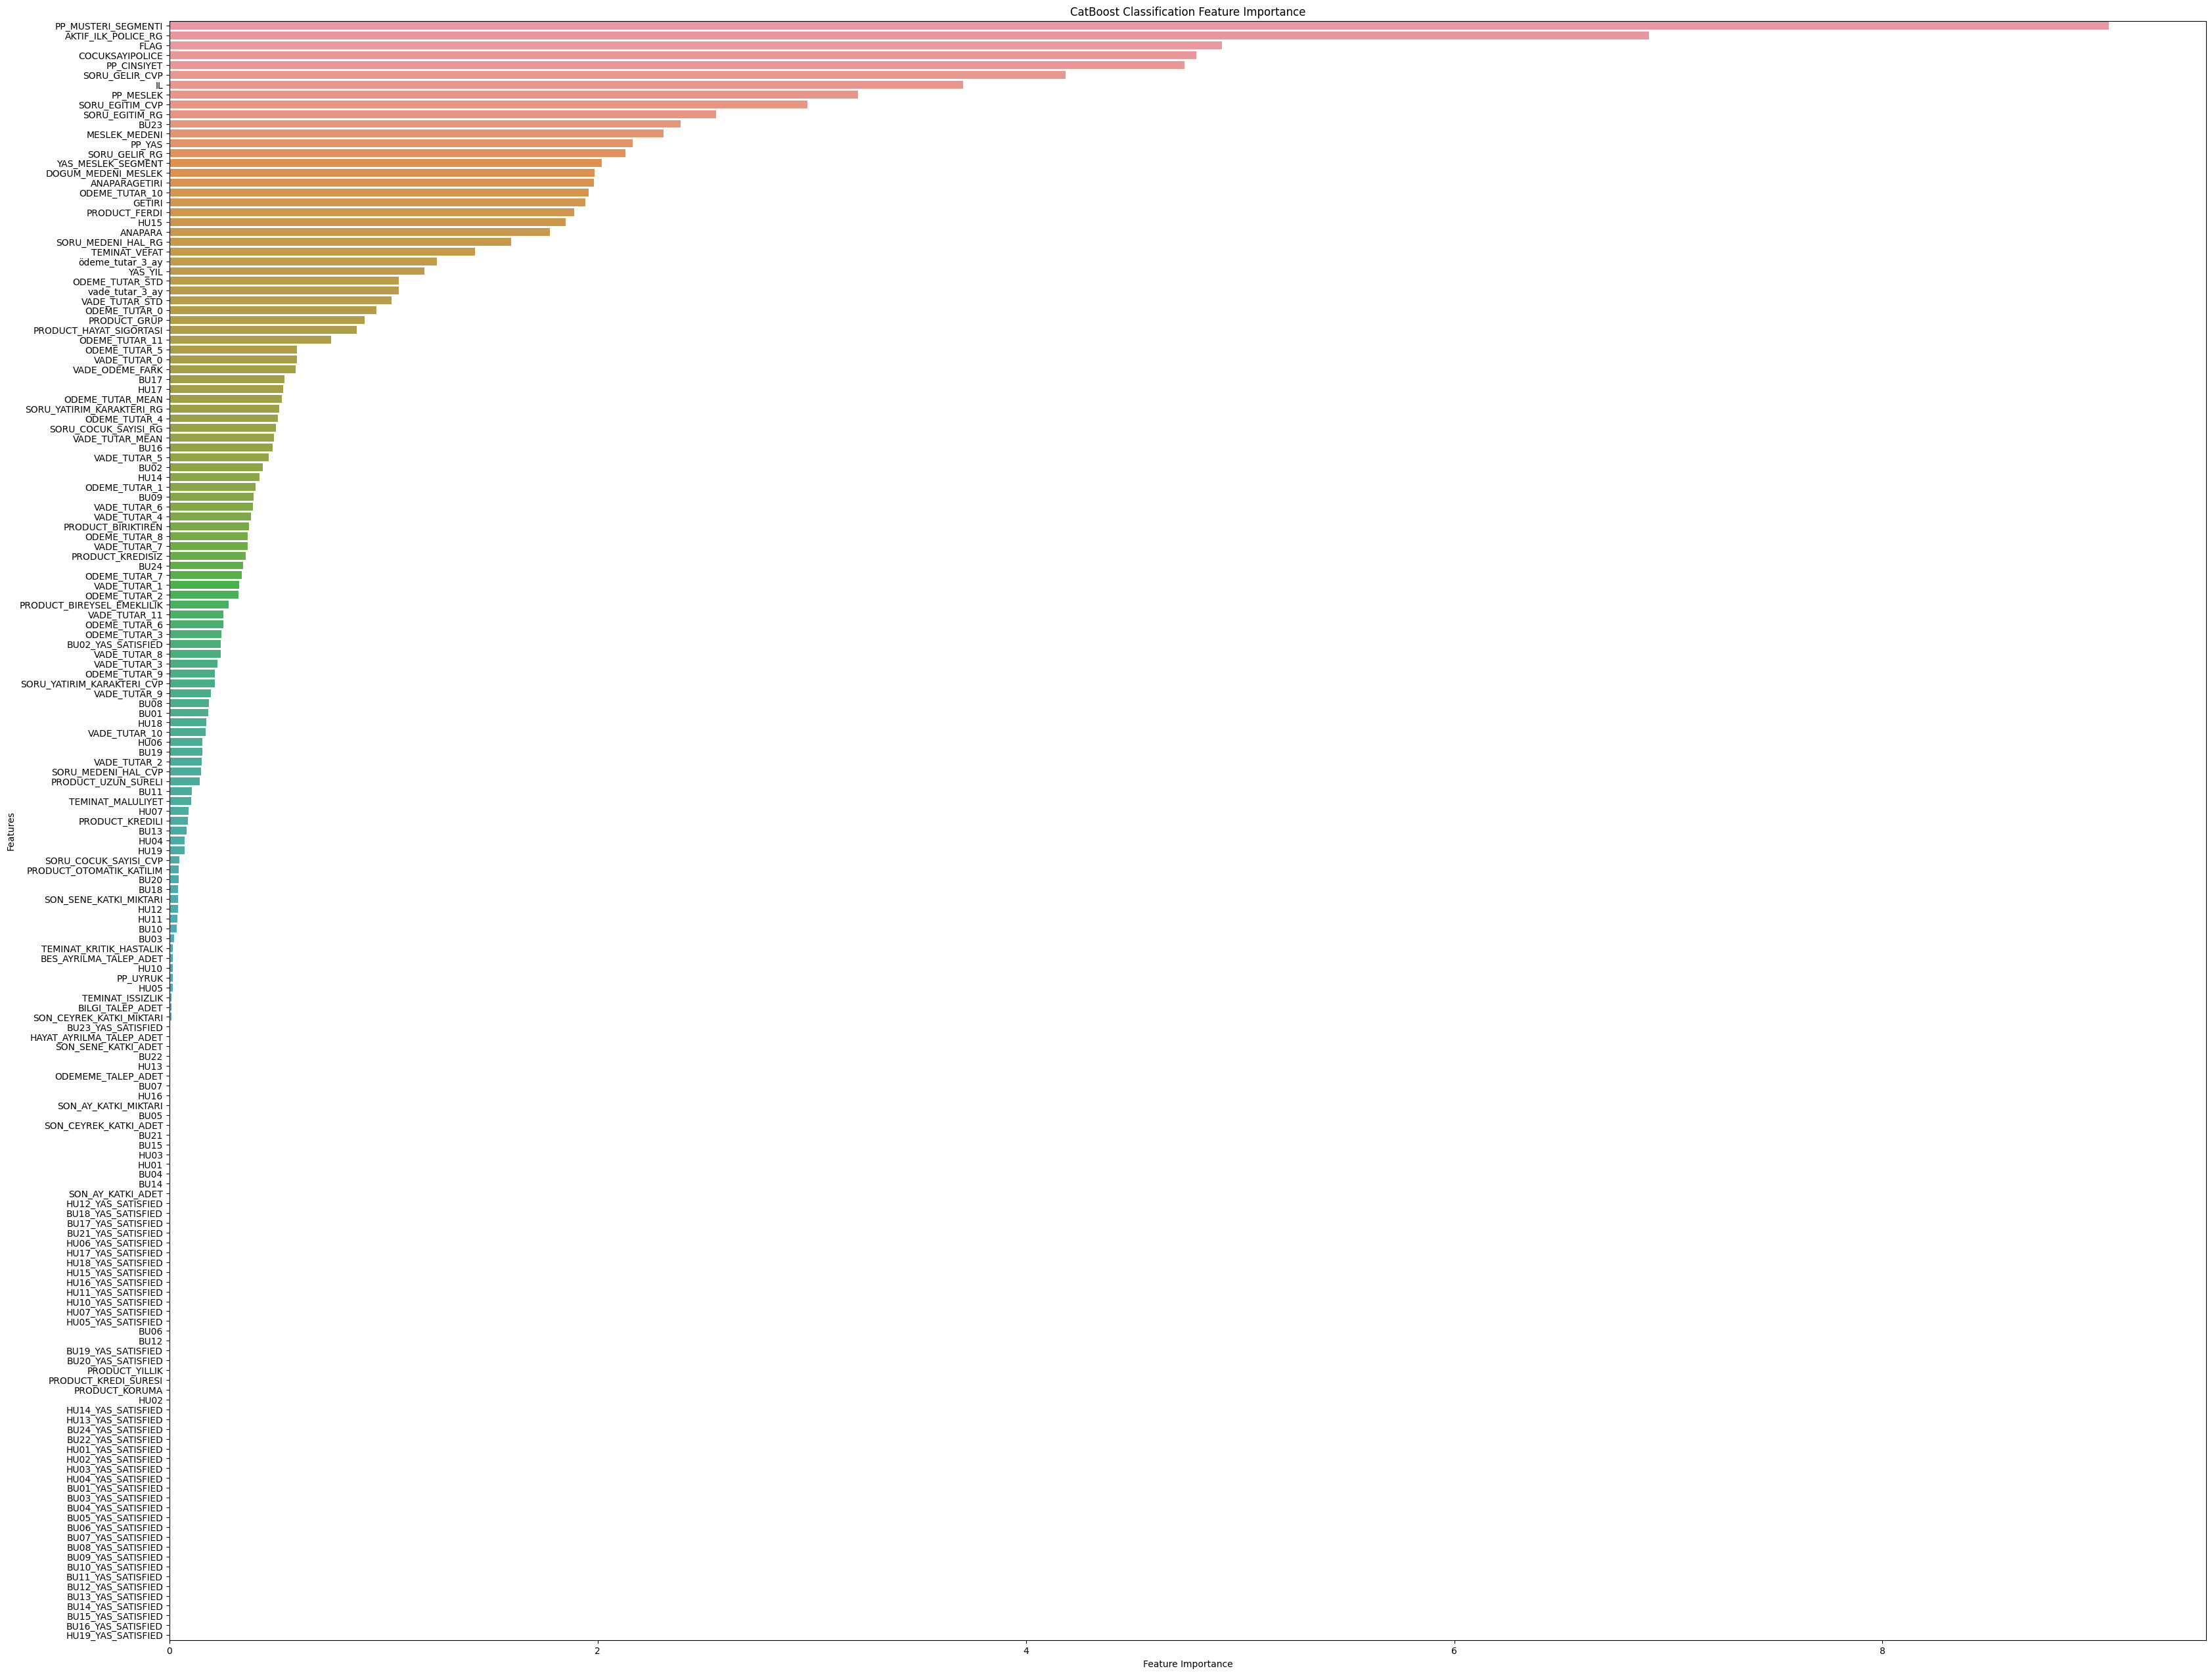

In [54]:
from matplotlib import pyplot as plt
# Function for plotting feature importance.
def plot_feature_importance(model_importance, features, model_name):

    # Create arrays of importance and features
    feature_importance = np.array(model_importance)
    feature_names = np.array(features)

    # Create  Dictionary for storing importance and names
    data={'features':feature_names,'importance':feature_importance}
    f_d = pd.DataFrame(data)

    # Sort by feature importance
    f_d.sort_values(by=['importance'], ascending=False,inplace=True)

    # Modify plot options
    plt.figure(figsize=(40,32))

    sns.barplot(x=f_d['importance'], y=f_d['features'])

    plt.title(model_name + 'Feature Importance')
    plt.xlabel('Feature Importance')
    plt.ylabel('Features')

plot_feature_importance(model.feature_importances_,train_df.drop('LABEL', axis=1).columns,'CatBoost Classification ')

### Prepare Submission X for Inference

In [55]:
X_submission = test_df.drop('LABEL', axis=1)
X_submission.head()
X_submission.columns

Index(['FLAG', 'PP_CINSIYET', 'PP_YAS', 'PP_MESLEK', 'PP_MUSTERI_SEGMENTI',
       'PP_UYRUK', 'IL', 'SORU_YATIRIM_KARAKTERI_CVP',
       'SORU_YATIRIM_KARAKTERI_RG', 'SORU_MEDENI_HAL_CVP',
       ...
       'HU10_YAS_SATISFIED', 'HU11_YAS_SATISFIED', 'HU12_YAS_SATISFIED',
       'HU13_YAS_SATISFIED', 'HU14_YAS_SATISFIED', 'HU15_YAS_SATISFIED',
       'HU16_YAS_SATISFIED', 'HU17_YAS_SATISFIED', 'HU18_YAS_SATISFIED',
       'HU19_YAS_SATISFIED'],
      dtype='object', length=165)

### Inference

In [56]:
y_pred = model.predict(X_submission)

In [57]:
print(len(y_pred))

195631


In [58]:
# Insert Predicted values into Test Dataframe
test_df['LABEL'] = y_pred
test_df.head()

,FLAG,PP_CINSIYET,PP_YAS,PP_MESLEK,PP_MUSTERI_SEGMENTI,PP_UYRUK,IL,SORU_YATIRIM_KARAKTERI_CVP,SORU_YATIRIM_KARAKTERI_RG,SORU_MEDENI_HAL_CVP,...,HU10_YAS_SATISFIED,HU11_YAS_SATISFIED,HU12_YAS_SATISFIED,HU13_YAS_SATISFIED,HU14_YAS_SATISFIED,HU15_YAS_SATISFIED,HU16_YAS_SATISFIED,HU17_YAS_SATISFIED,HU18_YAS_SATISFIED,HU19_YAS_SATISFIED
MUSTERI_ID,,,,,,,,,,,,,,,,,,,,,
15b29e51dff893ac19bcbc96c96d1cda0307b4e0edafcd565cea33fe24f516a8,5,1,252,55,2,0,3,5,-1.0,1,...,1,1,1,1,1,1,1,1,1,1
7532c2d4751858dd8e7eb3f26c61af568fd3b2a6aa2f32db98d7d58442898bd0,5,0,462,55,5,0,98,5,-1.0,1,...,1,1,1,1,1,1,1,1,1,1
47498c1c6161aea484b0eed7997846919ca9287684aee4046cc2708b7985fb9e,5,0,436,41,5,0,84,5,-1.0,1,...,1,1,1,1,1,1,1,1,1,1
48fe7f96c7e04326f1669b4ae5bdc5ae030da6b8c264984266878976dccd6b87,5,1,440,50,5,0,124,5,-1.0,1,...,1,1,1,1,1,1,1,1,1,1
26dbe514ebfdb7b664760c07f94d0bf0b297528cd5a35872a6756a00c6cb29a7,5,0,517,54,5,0,54,5,-1.0,2,...,1,1,1,1,1,1,1,1,1,1


#### Inverse Transform (Ordinal Encoder)

In [59]:
test_df[categorical_features] = ordinal_encoder.inverse_transform(test_df[categorical_features])
test_df.head()

,FLAG,PP_CINSIYET,PP_YAS,PP_MESLEK,PP_MUSTERI_SEGMENTI,PP_UYRUK,IL,SORU_YATIRIM_KARAKTERI_CVP,SORU_YATIRIM_KARAKTERI_RG,SORU_MEDENI_HAL_CVP,...,HU10_YAS_SATISFIED,HU11_YAS_SATISFIED,HU12_YAS_SATISFIED,HU13_YAS_SATISFIED,HU14_YAS_SATISFIED,HU15_YAS_SATISFIED,HU16_YAS_SATISFIED,HU17_YAS_SATISFIED,HU18_YAS_SATISFIED,HU19_YAS_SATISFIED
MUSTERI_ID,,,,,,,,,,,,,,,,,,,,,
15b29e51dff893ac19bcbc96c96d1cda0307b4e0edafcd565cea33fe24f516a8,KASIM,2,467,Öğretmen,103,1,1.0,nan,-1.0,Married,...,1,1,1,1,1,1,1,1,1,1
7532c2d4751858dd8e7eb3f26c61af568fd3b2a6aa2f32db98d7d58442898bd0,KASIM,1,658,Öğretmen,106,1,54.0,nan,-1.0,Married,...,1,1,1,1,1,1,1,1,1,1
47498c1c6161aea484b0eed7997846919ca9287684aee4046cc2708b7985fb9e,KASIM,1,634,Serbest Meslek,106,1,48.0,nan,-1.0,Married,...,1,1,1,1,1,1,1,1,1,1
48fe7f96c7e04326f1669b4ae5bdc5ae030da6b8c264984266878976dccd6b87,KASIM,2,638,nan,106,1,67.0,nan,-1.0,Married,...,1,1,1,1,1,1,1,1,1,1
26dbe514ebfdb7b664760c07f94d0bf0b297528cd5a35872a6756a00c6cb29a7,KASIM,1,80,Öğrenci,106,1,34.0,nan,-1.0,Single,...,1,1,1,1,1,1,1,1,1,1


In [60]:
# Display Some Statistics
test_df.describe()

,SORU_YATIRIM_KARAKTERI_RG,SORU_MEDENI_HAL_RG,SORU_EGITIM_RG,SORU_GELIR_CVP,SORU_GELIR_RG,SORU_COCUK_SAYISI_CVP,SORU_COCUK_SAYISI_RG,BES_AYRILMA_TALEP_ADET,ODEMEME_TALEP_ADET,HAYAT_AYRILMA_TALEP_ADET,...,HU10_YAS_SATISFIED,HU11_YAS_SATISFIED,HU12_YAS_SATISFIED,HU13_YAS_SATISFIED,HU14_YAS_SATISFIED,HU15_YAS_SATISFIED,HU16_YAS_SATISFIED,HU17_YAS_SATISFIED,HU18_YAS_SATISFIED,HU19_YAS_SATISFIED
count,195631.000000,195631.000000,195631.000000,1.956310e+05,195631.000000,195631.000000,195631.000000,195631.000000,195631.000000,195631.000000,...,195631.000000,195631.000000,195631.000000,195631.000000,195631.000000,195631.000000,195631.000000,195631.000000,195631.000000,195631.000000
mean,3.249127,78.408468,66.256340,1.657764e+04,59.057736,-0.537727,62.736744,0.011261,0.000460,0.001007,...,0.706999,0.706999,0.706999,0.706999,0.706999,0.706999,0.706999,0.706999,0.706999,0.706999
std,11.932500,73.809213,74.610311,3.405937e+06,72.813449,0.623466,83.043764,0.123839,0.023708,0.036930,...,0.455140,0.455140,0.455140,0.455140,0.455140,0.455140,0.455140,0.455140,0.455140,0.455140
min,-1.000000,-1.000000,-1.000000,-1.000000e+00,-1.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-1.000000,15.000000,2.000000,1.005132e+02,-1.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-1.000000,60.000000,37.000000,1.000000e+03,23.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
75%,-1.000000,119.000000,106.000000,4.534605e+03,105.000000,0.000000,118.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,52.000000,1487.000000,1487.000000,1.500000e+09,1487.000000,15.000000,1487.000000,15.000000,3.000000,4.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [61]:
# Choose columns for submission file
final_df = test_df.reset_index()[['MUSTERI_ID', 'LABEL']]
final_df.head()

,MUSTERI_ID,LABEL
0,15b29e51dff893ac19bcbc96c96d1cda0307b4e0edafcd...,UA
1,7532c2d4751858dd8e7eb3f26c61af568fd3b2a6aa2f32...,UA
2,47498c1c6161aea484b0eed7997846919ca9287684aee4...,UA
3,48fe7f96c7e04326f1669b4ae5bdc5ae030da6b8c26498...,UA
4,26dbe514ebfdb7b664760c07f94d0bf0b297528cd5a358...,UA


In [62]:
# Save submission file
final_df.to_csv('submission48.csv', index=False)